In [1]:
import warnings
import anndata            


warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)


warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module=r"squidpy\.pl\._spatial_utils"
)

warnings.filterwarnings(
    "ignore",
    category=anndata._core.views.ImplicitModificationWarning
)

In [2]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import seaborn as sns
import pickle


from matplotlib.colors import ListedColormap



In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig4"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# dotplot of expression

In [4]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]


def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

 

adata_5k



View of AnnData object with n_obs × n_vars = 1418806 × 4993
    obs: 'sample_id', 'barcode', 'GSE', 'Site_status', 'Patient_status', 'Location', 'Age', 'Sex', 'n_genes', 'dataset_id', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'lvl5_annotation', 'Mapping_status', 'scanvi_predictions', 'lvl5_annotation_new', 'lvl5_annotation_new2', 'lvl5_annotation_new3', 'lvl5_annotation_new_archive', 'lvl5_annotation_new_preoprhan', 'lvl5_annotation_new10', 'lvl5_annotation_new11', 'test', 'test_n', 'lvl5_annotation_new12', 'lvl5_annotation_new13', 'lvl4_annotation', 'lvl0', 'temp', 't', 'leiden_res0.1', 'Site_status_simple', 'StatusMilo', 'atlas_status', 'atlas_status_reynolds', 'atlas_status_reynolds_simple', 'atlas_status_simple', 'atlas_status_simple2', 'Site_status_binary', 'scanvi_labels

In [5]:
CATEGORY="lvl5_annotation"
NICHE_COLUMN   = "niche19"
NICHE_COL=NICHE_COLUMN

In [6]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
cell_types = adata_5k[adata_5k.obs[NICHE_COLUMN]=="Sebaceous_immune"].obs.lvl5_annotation.unique()
cell_types


['KC_Sebocyte_DuctOuter', 'cDC2: EREG+CCR7+', 'Tnaive', 'Treg', 'KC_Sebocyte_DuctInner_Junction', ..., 'VE3_Ven', 'TRM_IL17+', 'KC_Sebocyte_GlandBasal', 'MigDC (cDC1)', 'Tc3_IFNGhi']
Length: 53
Categories (53, object): ['F1: Superficial', 'F2: Universal', 'ILC1', 'ILC2', ..., 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi', 'cDC2_cycling', 'pDC']

# Sebaceous gland cmpositioon

In [8]:
SEB_SAMPLES = ['BK22_Lesional Baseline',
 'Lesional_CE4-SKI-27-FO-4-S22_replicate',
 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK30_Week 12',
 'BK18_Lesional Baseline',
 'BK30_Non-lesional Baseline',
 'BK51_wk8 Relapse',
 'BK25_Week 12',
 'BK30_Lesional Baseline',
 'BK24_Non-lesional Baseline']
SEB_SAMPLES

['BK22_Lesional Baseline',
 'Lesional_CE4-SKI-27-FO-4-S22_replicate',
 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK30_Week 12',
 'BK18_Lesional Baseline',
 'BK30_Non-lesional Baseline',
 'BK51_wk8 Relapse',
 'BK25_Week 12',
 'BK30_Lesional Baseline',
 'BK24_Non-lesional Baseline']

In [9]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

In [10]:
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin_XENIUMcelltypes.pkl'


In [11]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Load the dictionary from the file
with open(file_path, 'rb') as file:
    vertex_colors = pickle.load(file)

# Get unique cell types from adata_5k
valid_keys = set(adata_5k.obs[CATEGORY].unique())

# Filter vertex_colors to keep only valid keys
vertex_colors = {key: color for key, color in vertex_colors.items() if key in valid_keys}




In [12]:
adata_5k_i=adata_5k[adata_5k.obs[NICHE_COLUMN]=="Sebaceous_immune"]
{x:x for x in sorted(adata_5k_i.obs["lvl5_annotation"].unique())}

{'F1: Superficial': 'F1: Superficial',
 'F2: Universal': 'F2: Universal',
 'ILC1': 'ILC1',
 'ILC2': 'ILC2',
 'ILC3': 'ILC3',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'KC': 'KC',
 'KC1': 'KC1',
 'KC1-2_cycling': 'KC1-2_cycling',
 'KC2/3_cycling': 'KC2/3_cycling',
 'KC3': 'KC3',
 'KC5': 'KC5',
 'KC_HF: HFSC': 'KC_HF: HFSC',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: ORS1': 'KC_HF: ORS1',
 'KC_HF: ORS_junction': 'KC_HF: ORS_junction',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal': 'KC_Sebocyte_GlandBasal',
 'KCinflamm_basal': 'KCinflamm_basal',
 'LC': 'LC',
 'Mac2': 'Mac2',
 'Mast cell': 'Mast cell',
 'Melanocyte': 'Melanocyte',
 'MigDC (cDC1)': 'MigDC (cDC1)',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'MoDC': 'MoDC',
 'Monocyte': 'Monocyte',
 'NK': 'NK',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'T': 'T',
 'TRM_IL13+': 'TRM_IL13+',

In [13]:
RENAME = {
 'ILC1': 'ILC1',
 'ILC2': 'ILC2',
 'ILC3': 'ILC3',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'KC': 'KC',
 'KC1': 'KC',
 'KC1-2_cycling': 'KC',
 'KC2/3_cycling': 'KC',
 'KC3': 'KC',
 'KC5': 'KC',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal': 'KC_Sebocyte_GlandBasal',
 'KCinflamm_basal': 'KC',
 'LC': 'LC',
 'Mac2': 'Mac2',
 'Mast cell': 'Mast cell',
 'Melanocyte': 'Melanocyte',
 'MigDC (cDC1)': 'MigDC (cDC1)',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'MoDC': 'MoDC',
 'Monocyte': 'Monocyte',
 'NK': 'NK',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'T': 'T',
 'TRM_IL13+': 'TRM_IL13+',
 'TRM_IL17+': 'TRM_IL17+',
 'T_Prolif': 'T_Prolif',
 'Tc0': 'Tc',
 'Tc1': 'Tc',
 'Tc2': 'Tc',
 'Tc3_IFNGhi': 'Tc',
 'Th': 'Th',
 'Th/TRM prolif': 'Th/TRM prolif',
 'Tnaive': 'Tnaive',
 'Treg': 'Treg',
 'Treg/Tnaive_prolif': 'Treg/Tnaive_prolif',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'VE3_Ven': 'VE3_Ven',
 'cDC': 'cDC',
 'cDC1': 'cDC1',
 'cDC2': 'cDC2',
 'cDC2: EREG+CCR7+': 'cDC2: EREG+CCR7+',
 'cDC2: MMP12hi': 'cDC2: MMP12hi',
 'cDC2_cycling': 'cDC2_cycling',
 'pDC': 'pDC',
'F1: Superficial': 'F1: Superficial',
 'F2: Universal': 'F2: Universal',}
adata_5k.obs["lvl5_annotation"]=adata_5k.obs["lvl5_annotation"].map(RENAME).fillna(adata_5k.obs["lvl5_annotation"])
adata_5k.obs["lvl5_annotation"].value_counts()

lvl5_annotation
KC                  439537
F2: Universal       100872
Pericyte1            85232
VE3_Ven              69056
F1: Superficial      66070
                     ...  
Neutrophil              17
KC_HF: HS               14
ILC_Prolif              12
Mac_CX3CR1+              8
ILC1_NCR2+P2RX7+         8
Name: count, Length: 91, dtype: int64

In [14]:
[x for x in adata_5k.obs["lvl5_annotation"].unique() if x not in vertex_colors.keys()]

['Tc']

# composition by timepoint

In [15]:
NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL]==NICHE]
# Which samples to plot
sample_counts = adata_5k_i.obs["Site_status"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
#{x:x for x in adata_5k_i.obs[CATEGORY].unique()}




In [16]:
data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["Site_status"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COL].unique():
        continue
    adata_ii = adata_i[adata_i.obs[NICHE_COL] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs[CATEGORY].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["info_id6"] = DONOR_ID
    data.append(row)


In [17]:
desired_order = sorted(adata_5k_i.obs["lvl5_annotation"].unique())

In [18]:
df = pd.DataFrame(data).fillna(0).set_index("info_id6")
df
sample_ids = df.index.tolist()


# Then, drop cell types never >2% in any sample
#df = df.loc[:, (df > 0.005).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]
# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

#lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]
 

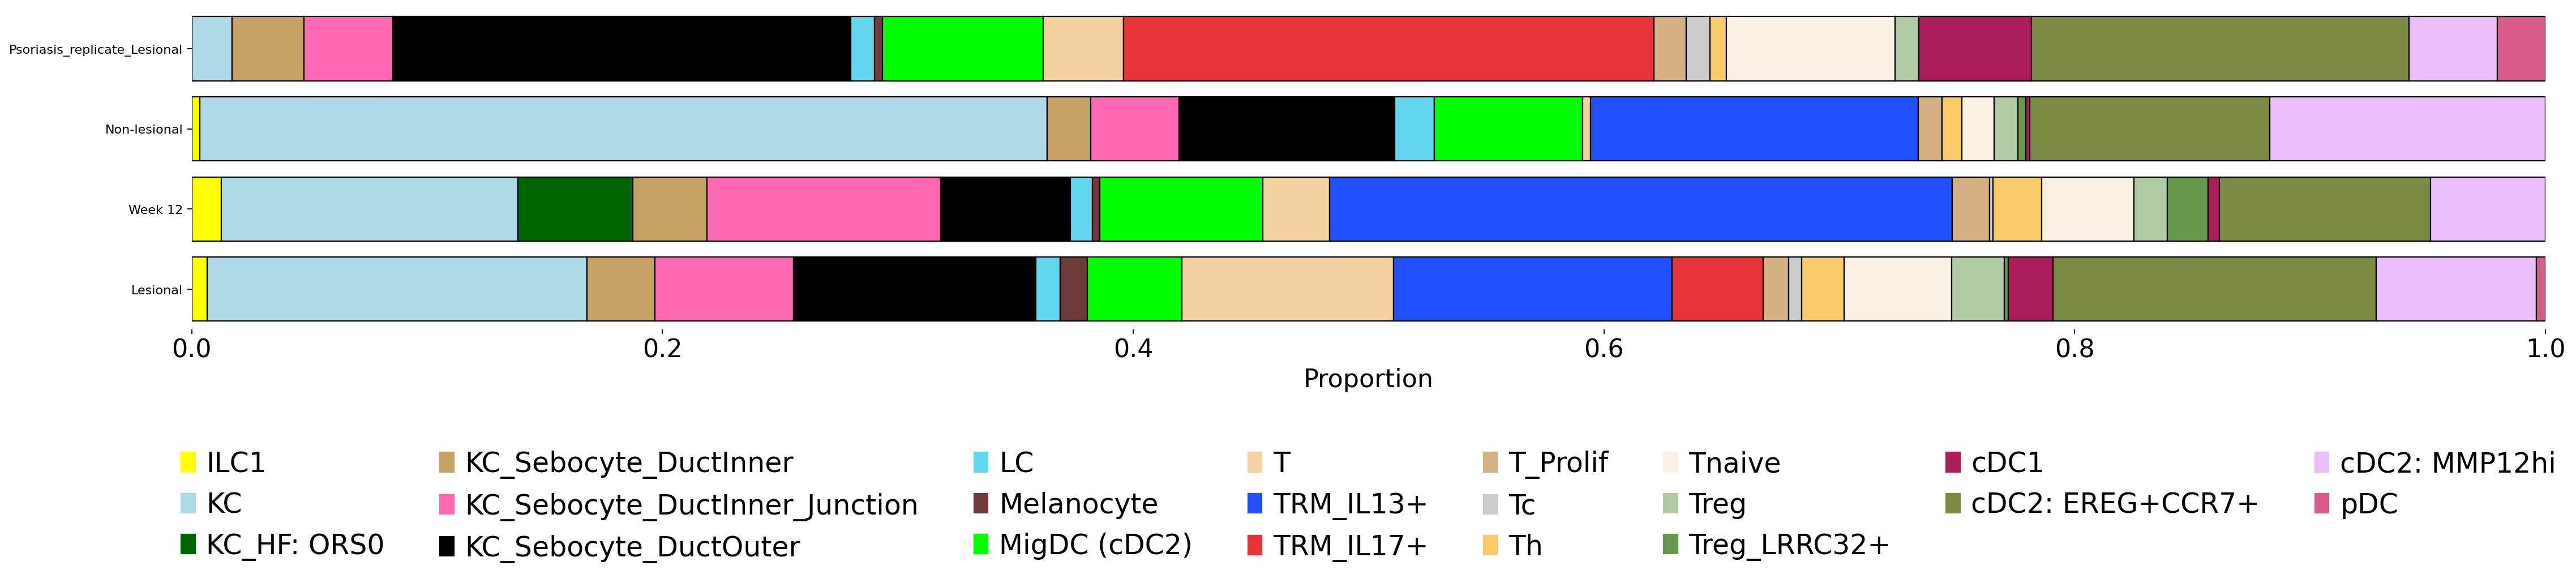

In [19]:
# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.01).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_proportions.pdf")
plt.show()

# composition by sample

In [20]:

NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL]==NICHE]
# Which samples to plot
sample_counts = adata_5k_i.obs["info_id6"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
{x:x for x in adata_5k_i.obs[CATEGORY].unique()}




{'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'cDC2: EREG+CCR7+': 'cDC2: EREG+CCR7+',
 'Tnaive': 'Tnaive',
 'Treg': 'Treg',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'TRM_IL13+': 'TRM_IL13+',
 'LC': 'LC',
 'Melanocyte': 'Melanocyte',
 'KC': 'KC',
 'cDC2: MMP12hi': 'cDC2: MMP12hi',
 'ILC2': 'ILC2',
 'Mac2': 'Mac2',
 'cDC2': 'cDC2',
 'cDC': 'cDC',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'cDC1': 'cDC1',
 'T': 'T',
 'Th/TRM prolif': 'Th/TRM prolif',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'Th': 'Th',
 'T_Prolif': 'T_Prolif',
 'Tc': 'Tc',
 'Treg/Tnaive_prolif': 'Treg/Tnaive_prolif',
 'ILC1': 'ILC1',
 'Monocyte': 'Monocyte',
 'pDC': 'pDC',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Mast cell': 'Mast cell',
 'cDC2_cycling': 'cDC2_cycling',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: HFSC': 'KC_HF: HFSC',
 'KC_HF: ORS1': 'KC_HF: ORS1',
 'KC_HF: ORS_junction': 'KC_HF: 

In [21]:
adata_5k_i.obs.info_id6.value_counts()

info_id6
BK22_Lesional Baseline                    961
BK30_Non-lesional Baseline                430
BK51_wk8 Relapse                          360
Lesional_CE4-SKI-27-FO-4-S22-A2           309
BK30_Week 12                              301
Lesional_CE4-SKI-27-FO-4-S22_replicate    296
BK21_Week 12                              232
BK30_Lesional Baseline                    203
BK24_Non-lesional Baseline                176
BK25_Week 12                              113
BK18_Lesional Baseline                     52
3D_BK25_week12-D2                           9
3D_BK25_week12-C2                           6
3D_BK22_Lesional_baseline-A1                4
3D_BK25_week12-B2                           3
BK30_Day 14                                 2
BK22_Non-lesional Baseline                  1
BK18_Week 12                                1
Name: count, dtype: int64

In [22]:
data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["info_id6"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COL].unique():
        continue
    adata_ii = adata_i[adata_i.obs[NICHE_COL] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs[CATEGORY].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["info_id6"] = DONOR_ID
    print(DONOR_ID)
    data.append(row)

    
    

BK22_Lesional Baseline
BK30_Non-lesional Baseline
BK51_wk8 Relapse
Lesional_CE4-SKI-27-FO-4-S22-A2
BK30_Week 12
Lesional_CE4-SKI-27-FO-4-S22_replicate
BK21_Week 12
BK30_Lesional Baseline
BK24_Non-lesional Baseline
BK25_Week 12


In [23]:
# desired_order=[ 'KC_Sebocyte_DuctInner_Junction', 
# 'KC_Sebocyte_DuctInner','KC_Sebocyte_DuctOuter',  'KC1', 'KC2',  'KC1/2', 'KC1-2_cycling',
#                'KC2/3_cycling',

 







               
               
#              'KCinflamm_basal',  'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
#  'Melanocyte',
#  'TRM_IL13+',
#      'TRM_IL17+','Th/TRM prolif',
    
#      'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','Treg/Tnaive_prolif', 'T',
# 'Tc0','Tc1','Tc2',
#         'ILC1','ILC2',
#     'ILC3_CCL1+PTGDS+', 'Mast cell',

#     'MigDC (cDC2)',
#     'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC1',






#  'LC','cDC2: EREG+CCR7+','cDC',
#  'pDC',
#                'Mac2', 'Monocyte',
    
# 'Melanocyte','Nonspecific','KC',  "TransitionalDC", 'Sweat gland channel outer',

# ]



In [24]:
samples_to_keep

CategoricalIndex(['BK22_Lesional Baseline', 'BK30_Non-lesional Baseline',
                  'BK51_wk8 Relapse', 'Lesional_CE4-SKI-27-FO-4-S22-A2',
                  'BK30_Week 12', 'Lesional_CE4-SKI-27-FO-4-S22_replicate',
                  'BK21_Week 12', 'BK30_Lesional Baseline',
                  'BK24_Non-lesional Baseline', 'BK25_Week 12'],
                 categories=['3D_BK22_Lesional_baseline-A1', '3D_BK25_week12-B2', '3D_BK25_week12-C2', '3D_BK25_week12-D2', ..., 'BK30_Week 12', 'BK51_wk8 Relapse', 'Lesional_CE4-SKI-27-FO-4-S22-A2', 'Lesional_CE4-SKI-27-FO-4-S22_replicate'], ordered=False, dtype='category', name='info_id6')

In [25]:
adata_5k[adata_5k.obs[NICHE_COL] == "Sebaceous_immune"].obs["info_id6"].value_counts()

info_id6
BK22_Lesional Baseline                    961
BK30_Non-lesional Baseline                430
BK51_wk8 Relapse                          360
Lesional_CE4-SKI-27-FO-4-S22-A2           309
BK30_Week 12                              301
Lesional_CE4-SKI-27-FO-4-S22_replicate    296
BK21_Week 12                              232
BK30_Lesional Baseline                    203
BK24_Non-lesional Baseline                176
BK25_Week 12                              113
BK18_Lesional Baseline                     52
3D_BK25_week12-D2                           9
3D_BK25_week12-C2                           6
3D_BK22_Lesional_baseline-A1                4
3D_BK25_week12-B2                           3
BK30_Day 14                                 2
BK22_Non-lesional Baseline                  1
BK18_Week 12                                1
Name: count, dtype: int64

In [26]:
adata_5k_i.obs["Site_status"].value_counts()

Site_status
Lesional                        1885
Week 12                          647
Non-lesional                     607
Psoriasis_replicate_Lesional     296
3D_Week12                         18
3D_Lesional_baseline               4
Day 14_HF                          2
Name: count, dtype: int64

Lesional_AD
Week 12_AD
Non-lesional_AD
Lesional_Psoriasis
Psoriasis_replicate_Lesional_Psoriasis


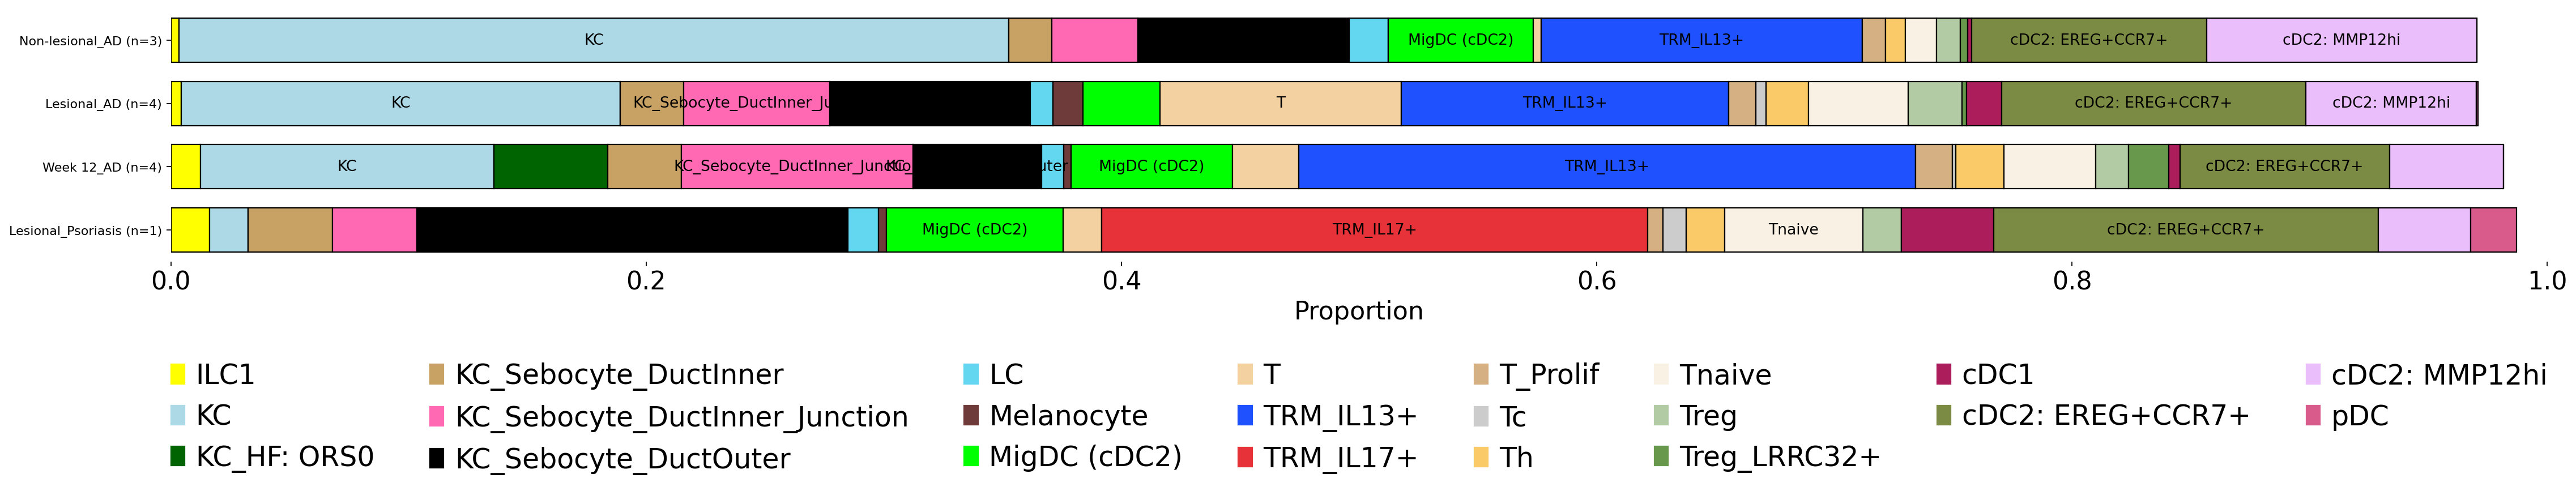

In [27]:
NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))
adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL] == "Sebaceous_immune"]

adata_5k_i.obs["seb_immune"] = (
    adata_5k_i.obs["Site_status"].astype(str)
    + "_"
    + adata_5k_i.obs["disease_overall"].astype(str)
)


# Which samples to plot
sample_counts = adata_5k_i.obs["seb_immune"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
#{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}
adata_5k_i.obs["seb_immune"].value_counts()


data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["seb_immune"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COL].unique():
        continue
    adata_ii = adata_i[adata_i.obs[NICHE_COL] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs[CATEGORY].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["seb_immune"] = DONOR_ID
    print(DONOR_ID)
    data.append(row)
data
df = pd.DataFrame(data).fillna(0).set_index("seb_immune")


sample_ids = df.index.tolist()

# Renormalize so rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

# Your explicit row order
desired_row_order = [
    "Non-lesional_AD",
    "Lesional_AD",
    "Week 12_AD",
    "Lesional_Psoriasis",
]
desired_row_order = desired_row_order[::-1]

# Reindex df to match row order
df = df.reindex(desired_row_order)

# Renormalize after reindex
df = df.div(df.sum(axis=1), axis=0)

# Pick colors
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# ────────────────────────────────
# Compute donor counts per seb_immune
# ────────────────────────────────
donor_counts = (
    adata_5k_i.obs.groupby("seb_immune")["info_id6"]
    .nunique()
    .to_dict()
)

# Build new ytick labels with donor counts
ytick_labels = [
    f"{label} (n={donor_counts.get(label, 0)})" for label in df.index
]

# ────────────────────────────────
# Plot
# ────────────────────────────────
fig, ax = plt.subplots(figsize=(30, 4))
bottom = [0] * len(df)
y_pos = range(len(df))

for cell_type, color in zip(lvl5_labels, bar_colors):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor="black",
        height=0.7,
        label=cell_type,
    )
    # Add text labels for segments >5%
    for j, (val, left) in enumerate(zip(values, bottom)):
        if val > 0.05:
            ax.text(
                left + val / 2,
                j,
                f"{cell_type}",
                ha="center",
                va="center",
                fontsize=12,
                color="black",
            )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(ytick_labels, fontsize=10)
ax.tick_params(axis="x", labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22,
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/4b_sebaceous_immune_overall_proportions_text.pdf", dpi=300)
plt.show()

Lesional_AD
Week 12_AD
Non-lesional_AD
Lesional_Psoriasis
Psoriasis_replicate_Lesional_Psoriasis


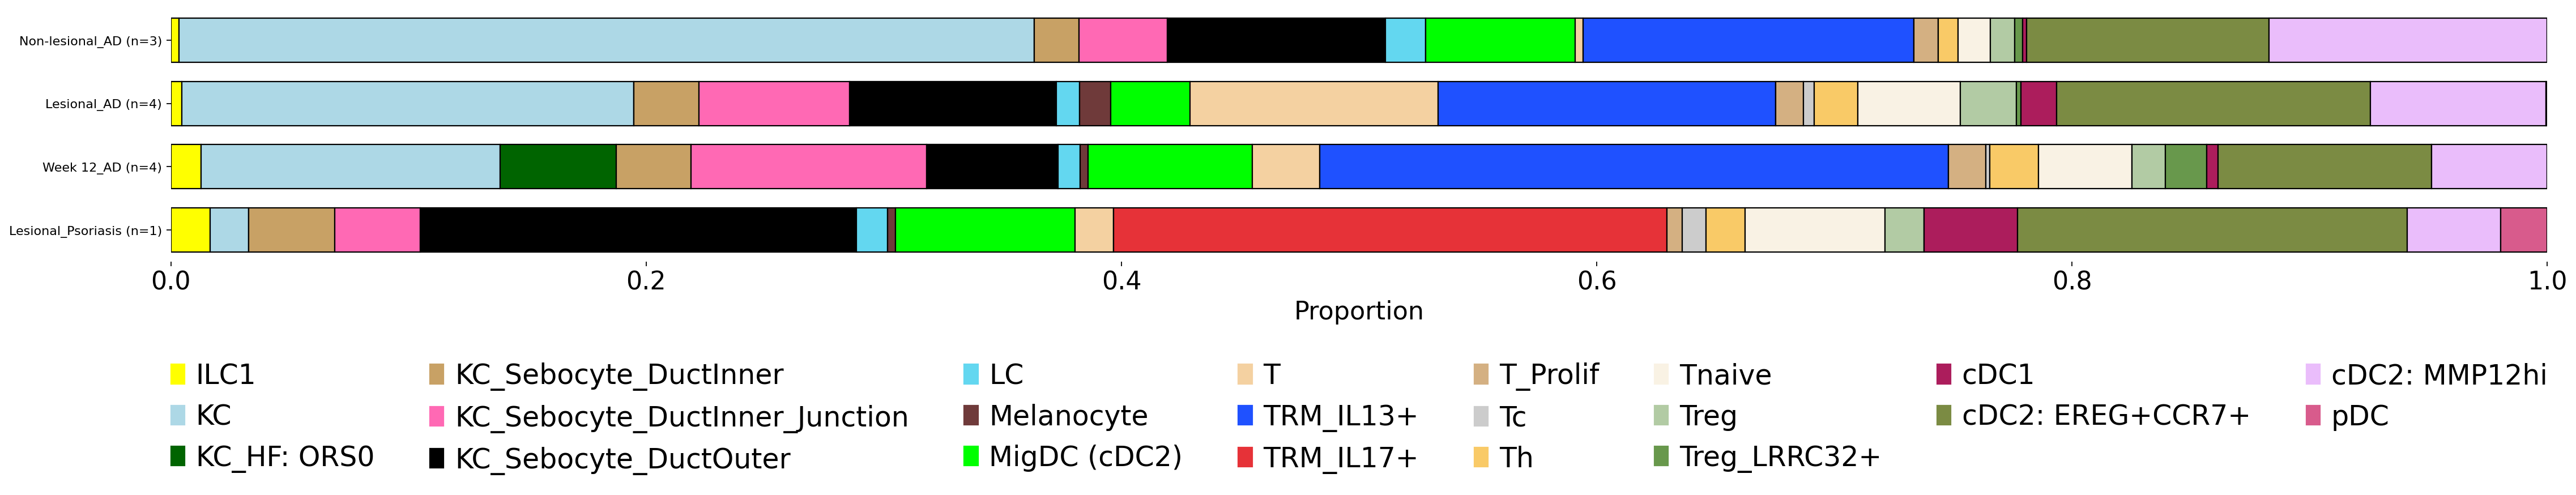

In [28]:
NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))
adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL] == "Sebaceous_immune"]

adata_5k_i.obs["seb_immune"] = (
    adata_5k_i.obs["Site_status"].astype(str)
    + "_"
    + adata_5k_i.obs["disease_overall"].astype(str)
)


# Which samples to plot
sample_counts = adata_5k_i.obs["seb_immune"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
#{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}
adata_5k_i.obs["seb_immune"].value_counts()


data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["seb_immune"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COL].unique():
        continue
    adata_ii = adata_i[adata_i.obs[NICHE_COL] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs[CATEGORY].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["seb_immune"] = DONOR_ID
    print(DONOR_ID)
    data.append(row)
data
df = pd.DataFrame(data).fillna(0).set_index("seb_immune")


sample_ids = df.index.tolist()

# Renormalize so rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

# Your explicit row order
desired_row_order = [
    "Non-lesional_AD",
    "Lesional_AD",
    "Week 12_AD",
    "Lesional_Psoriasis",
]
desired_row_order = desired_row_order[::-1]

# Reindex df to match row order
df = df.reindex(desired_row_order)

# Renormalize after reindex
# Make sure all lvl5_labels exist in df
df = df.reindex(columns=lvl5_labels, fill_value=0)

# Renormalize so rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

# Colors in the right order
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]
# ────────────────────────────────
# Compute donor counts per seb_immune
# ────────────────────────────────
donor_counts = (
    adata_5k_i.obs.groupby("seb_immune")["info_id6"]
    .nunique()
    .to_dict()
)

# Build new ytick labels with donor counts
ytick_labels = [
    f"{label} (n={donor_counts.get(label, 0)})" for label in df.index
]

# ────────────────────────────────
# Plot
# ────────────────────────────────
fig, ax = plt.subplots(figsize=(30, 4))
bottom = [0] * len(df)
y_pos = range(len(df))

for cell_type, color in zip(lvl5_labels, bar_colors):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor="black",
        height=0.7,
        label=cell_type,
    )
    # Add text labels for segments >5%
    # for j, (val, left) in enumerate(zip(values, bottom)):
    #     if val > 0.05:
    #         ax.text(
    #             left + val / 2,
    #             j,
    #             f"{cell_type}",
    #             ha="center",
    #             va="center",
    #             fontsize=12,
    #             color="black",
    #         )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(ytick_labels, fontsize=10)
ax.tick_params(axis="x", labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22,
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/4b_sebaceous_immune_overall_proportions_notext.pdf", dpi=300)
plt.show()

In [29]:

# i=0
# for x in list(data[0].keys()):
#     if x not in desired_order:
#         if x!="info_id6":
#             i+=1
#             print(x)
#    # else:
#    #     print("found", x)
# if i!=0:
#     stop

In [30]:
# df = pd.DataFrame(data).fillna(0).set_index("info_id6")
# df

In [31]:
# vertex_colors = vertex_colors | {"KC":'#505aa1', "KC_HF: ORS": '#006400', }

In [32]:
# sample_ids = df.index.tolist()
# sample_ids

In [33]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Your explicit row order
# desired_row_order = [
#  'BK30_Non-lesional Baseline',
#      'BK24_Non-lesional Baseline',
#  'BK51_wk8 Relapse',
#     'BK22_Lesional Baseline',
#  'BK30_Lesional Baseline',
#  'BK30_Week 12',

#      'BK21_Week 12',

#  'BK25_Week 12',
#  'Lesional_CE4-SKI-27-FO-4-S22_replicate',
#  'Lesional_CE4-SKI-27-FO-4-S22-A2',
# ]
# desired_row_order=desired_row_order[::-1]


# df = df.reindex(desired_row_order)




# # Drop cell types not present in desired order
# # Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# # Renormalize each row to sum to 1 (important for stacked bar proportions)
# df = df.div(df.sum(axis=1), axis=0)

# bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# # Plot
# fig, ax = plt.subplots(figsize=(30, 5))
# bottom = [0] * len(df)
# y_pos = range(len(df))
# for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
#     values = df[cell_type].values
#     ax.barh(
#         y=y_pos,
#         width=values,
#         left=bottom,
#         color=color,
#         edgecolor='black',
#         height=0.8,
#         label=cell_type
#     )
#     bottom = [b + v for b, v in zip(bottom, values)]

# # Y-axis labels
# ax.set_yticks(range(len(df)))
# ax.set_yticklabels(df.index, fontsize=10)
# ax.tick_params(axis='x', labelsize=20)

# ax.set_xlabel("Proportion", fontsize=20)
# ax.set_xlim(0, 1)
# ax.set_ylim(-0.5, len(df) - 0.5)
# ax.grid(False)
# for spine in ["top", "right", "left", "bottom"]:
#     ax.spines[spine].set_visible(False)

# # Legend
# ax.legend(
#     handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
#     labels=lvl5_labels,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.3),
#     ncol=8,
#     frameon=False,
#     fontsize=22
# )

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.25)
# plt.savefig("fig4/sebaceous_immune_proportions.pdf")
# plt.show()

In [34]:



# # Then, drop cell types never >2% in any sample
# #df = df.loc[:, (df > 0.005).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]
# # Renormalize so that rows sum to 1
# df = df.div(df.sum(axis=1), axis=0)

# #lvl5_labels = df.columns.tolist()  # update after filtering
# bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# # row_order = [ 4,  0, 1, 2, 3]
# # #row_order=row_order[::-1]
# # if len(row_order)== len(sample_ids):
# #     df = df.iloc[row_order, :]
# # else:
# #     print("mismatch # rows. Not reordered")
# # #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]


# # Your explicit row order
# # desired_row_order = [    'BK51_wk8 Relapse',
# #     'BK22_Lesional Baseline',

# #     'BK25_Week 12',
# #     'BK21_Week 12',
# #     'Lesional_CE4-SKI-27-FO-4-S22-A2',
# # ]
# # desired_row_order=desired_row_order[::-1]


# # df = df.reindex(desired_row_order)


 
# # Plot
# fig, ax = plt.subplots(figsize=(30, 5))
# bottom = [0] * len(df)
# y_pos = range(len(df))
# for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
#     values = df[cell_type].values
#     ax.barh(
#         y=y_pos,
#         width=values,
#         left=bottom,
#         color=color,
#         edgecolor='black',
#         height=0.8,
#         label=cell_type
#     )
#     bottom = [b + v for b, v in zip(bottom, values)]

# # Y-axis labels
# ax.set_yticks(range(len(df)))
# ax.set_yticklabels(df.index, fontsize=10)
# ax.tick_params(axis='x', labelsize=20)

# ax.set_xlabel("Proportion", fontsize=20)
# ax.set_xlim(0, 1)
# ax.set_ylim(-0.5, len(df) - 0.5)
# ax.grid(False)
# for spine in ["top", "right", "left", "bottom"]:
#     ax.spines[spine].set_visible(False)

# # Legend
# ax.legend(
#     handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
#     labels=lvl5_labels,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.3),
#     ncol=8,
#     frameon=False,
#     fontsize=22
# )

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.25)
# plt.savefig("fig4/sebaceous_immune_proportions2.pdf")
# plt.show()

In [35]:
sample_ids

['Lesional_AD',
 'Week 12_AD',
 'Non-lesional_AD',
 'Lesional_Psoriasis',
 'Psoriasis_replicate_Lesional_Psoriasis']

In [36]:
0

0

# try by overall population

In [37]:
adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL]=="Sebaceous_immune"]
adata_5k_i.shape
#adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional"]
#adata_5k_i.obs.Site_status.value_counts()
#adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Site_status"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()





seb_immune
Lesional_AD                               1576
Week 12_AD                                 647
Non-lesional_AD                            607
Lesional_Psoriasis                         309
Psoriasis_replicate_Lesional_Psoriasis     296
3D_Week12_AD                                18
3D_Lesional_baseline_AD                      4
Day 14_HF_AD                                 2
Name: count, dtype: int64

In [38]:
NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

# Which samples to plot
sample_counts = adata_5k_i.obs["seb_immune"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
#{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}
adata_5k_i.obs["seb_immune"].value_counts()


seb_immune
Lesional_AD                               1576
Week 12_AD                                 647
Non-lesional_AD                            607
Lesional_Psoriasis                         309
Psoriasis_replicate_Lesional_Psoriasis     296
3D_Week12_AD                                18
3D_Lesional_baseline_AD                      4
Day 14_HF_AD                                 2
Name: count, dtype: int64

In [39]:
# Count the occurrences per cell type
counts = adata_5k_i.obs["lvl5_annotation"].value_counts()

# Keep only categories with >= 5 cells
valid_types = counts[counts >= 5].index

# Subset AnnData to only those
adata_5k_i = adata_5k_i[adata_5k_i.obs["lvl5_annotation"].isin(valid_types)].copy()

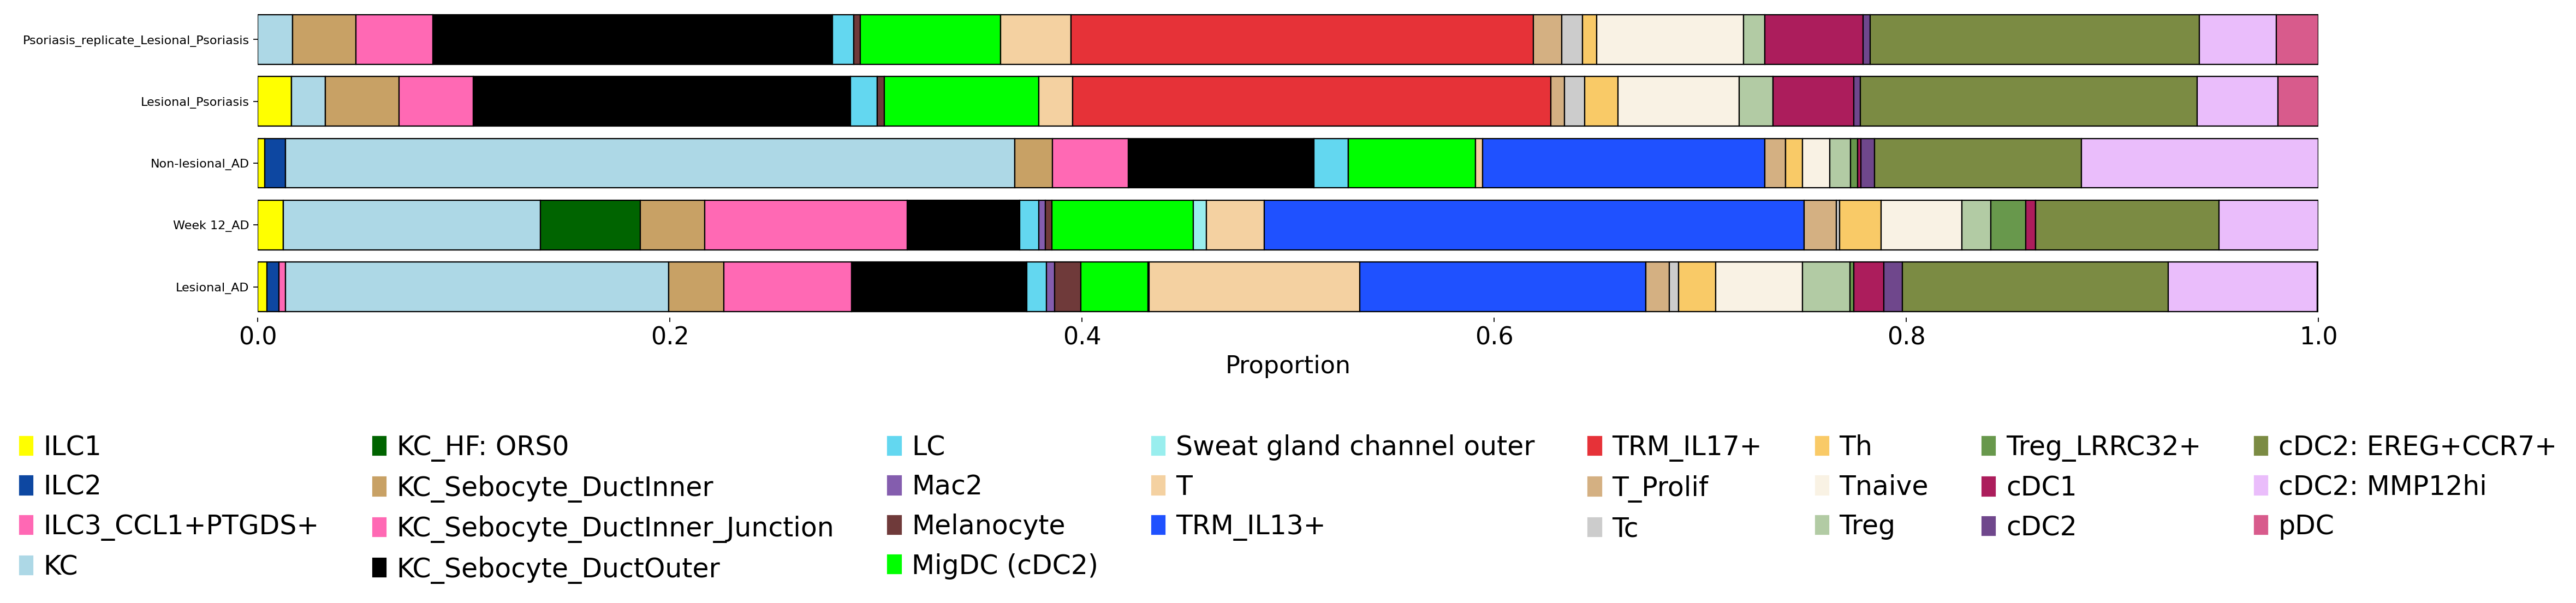

In [40]:
# desired_order=[ 'KC_Sebocyte_DuctInner_Junction', 
# 'KC_Sebocyte_DuctInner','KC_Sebocyte_DuctOuter',  'KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
#  'Melanocyte',
#  'TRM_IL13+',
#      'TRM_IL17+',
    
#      'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

#         'ILC1','ILC2',
#     'ILC3_CCL1+PTGDS+',

#     'MigDC (cDC2)',
#     'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC1',






#  'LC','cDC2: EREG+CCR7+',
#  'pDC',
    
# 'Melanocyte','Nonspecific','KC',  "TransitionalDC", 

# ]




data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["seb_immune"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COL].unique():
        continue
    adata_ii = adata_i[adata_i.obs[NICHE_COL] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs["lvl5_annotation"].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["seb_immune"] = DONOR_ID
    data.append(row)


df = pd.DataFrame(data).fillna(0).set_index("seb_immune")
df

sample_ids = df.index.tolist()


# Then, drop cell types never >2% in any sample
#df = df.loc[:, (df > 0.005).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]
# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

#lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 4,  0, 1, 2, 3]
# #row_order=row_order[::-1]
# if len(row_order)== len(sample_ids):
#     df = df.iloc[row_order, :]
# else:
#     print("mismatch # rows. Not reordered")
# #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]


# # Your explicit row order
# desired_row_order = ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']

# desired_row_order=desired_row_order[::-1]


# df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_overall_proportions.pdf")
plt.show()

In [41]:
adata_5k_i = adata_5k[adata_5k.obs[NICHE_COL]=="Sebaceous_immune"]
# adata_5k_i.shape
# adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional"]
# adata_5k_i.obs.Site_status.value_counts()
# adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Site_status"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()





seb_immune
Lesional_AD                               1576
Week 12_AD                                 647
Non-lesional_AD                            607
Lesional_Psoriasis                         309
Psoriasis_replicate_Lesional_Psoriasis     296
3D_Week12_AD                                18
3D_Lesional_baseline_AD                      4
Day 14_HF_AD                                 2
Name: count, dtype: int64

In [42]:
# adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]


In [43]:
# for x in  ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']:
#     sc.pl.dotplot(
#     adata_5k_i[adata_5k_i.obs["seb_immune"]==x],
#     ["CXCR3"],
#     groupby="lvl4_annotation",
#     #standard_scale="var",
#     dendrogram=False,
#     dot_max=.3,
#     vmax=.8,
#         title=x,
#         swap_axes=True
# )



In [44]:
NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

#adata_5k_i=adata_5k_i[adata_5k_i.obs["lvl4_annotation"]!="Nonspecific"]
# Which samples to plot
sample_counts = adata_5k_i.obs["seb_immune"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}




{'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'cDC2: EREG+CCR7+': 'cDC2: EREG+CCR7+',
 'Tnaive': 'Tnaive',
 'Treg': 'Treg',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'TRM_IL13+': 'TRM_IL13+',
 'LC': 'LC',
 'Melanocyte': 'Melanocyte',
 'KC': 'KC',
 'cDC2: MMP12hi': 'cDC2: MMP12hi',
 'ILC2': 'ILC2',
 'Mac2': 'Mac2',
 'cDC2': 'cDC2',
 'cDC': 'cDC',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'cDC1': 'cDC1',
 'T': 'T',
 'Th/TRM prolif': 'Th/TRM prolif',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'Th': 'Th',
 'T_Prolif': 'T_Prolif',
 'Tc': 'Tc',
 'Treg/Tnaive_prolif': 'Treg/Tnaive_prolif',
 'ILC1': 'ILC1',
 'Monocyte': 'Monocyte',
 'pDC': 'pDC',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Mast cell': 'Mast cell',
 'cDC2_cycling': 'cDC2_cycling',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: HFSC': 'KC_HF: HFSC',
 'KC_HF: ORS1': 'KC_HF: ORS1',
 'KC_HF: ORS_junction': 'KC_HF: 

In [45]:

df = pd.DataFrame(data).fillna(0).set_index("seb_immune")
df


,KC,TRM_IL13+,cDC2: EREG+CCR7+,T,KC_Sebocyte_DuctOuter,cDC2: MMP12hi,KC_Sebocyte_DuctInner_Junction,Tnaive,MigDC (cDC2),KC_Sebocyte_DuctInner,...,ILC2,Tc,ILC1,Mac2,ILC3_CCL1+PTGDS+,Treg_LRRC32+,pDC,Sweat gland channel outer,KC_HF: ORS0,TRM_IL17+
seb_immune,,,,,,,,,,,,,,,,,,,,,
Lesional_AD,0.185942,0.138658,0.129073,0.102236,0.084984,0.072204,0.061981,0.042173,0.032588,0.026837,...,0.005751,0.004473,0.004473,0.003834,0.003195,0.001917,0.000639,0.000639,0.000000,0.000000
Week 12_AD,0.124805,0.262090,0.088924,0.028081,0.054602,0.048362,0.098284,0.039002,0.068643,0.031201,...,0.000000,0.001560,0.012480,0.003120,0.000000,0.017161,0.000000,0.006240,0.048362,0.000000
Non-lesional_AD,0.353923,0.136895,0.100167,0.003339,0.090150,0.115192,0.036728,0.013356,0.061770,0.018364,...,0.010017,0.000000,0.003339,0.000000,0.000000,0.003339,0.000000,0.000000,0.000000,0.000000
Lesional_Psoriasis,0.016340,0.000000,0.163399,0.016340,0.183007,0.039216,0.035948,0.058824,0.075163,0.035948,...,0.000000,0.009804,0.016340,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.232026
Psoriasis_replicate_Lesional_Psoriasis,0.017007,0.000000,0.159864,0.034014,0.193878,0.037415,0.037415,0.071429,0.068027,0.030612,...,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.224490


In [46]:
# desired_order=[ 'KC_Sebocyte_DuctInner_Junction', 
# 'KC_Sebocyte_DuctInner','KC_Sebocyte_DuctOuter',  'KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
#  'Melanocyte',
#  'TRM_IL13+',
#      'TRM_IL17+',
    
#      'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

#         'ILC1','ILC2',
#     'ILC3_CCL1+PTGDS+',

#     'MigDC (cDC2)',
#     'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC1',






#  'LC','cDC2: EREG+CCR7+',
#  'pDC',
    
# 'Melanocyte','Nonspecific','KC',  "TransitionalDC", 

# ]


# Then, drop cell types never >2% in any sample
#df = df.loc[:, (df > 0.005).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]


In [47]:

sample_ids = df.index.tolist()


# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

#lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 4,  0, 1, 2, 3]
# #row_order=row_order[::-1]
# if len(row_order)== len(sample_ids):
#     df = df.iloc[row_order, :]
# else:
#     print("mismatch # rows. Not reordered")
# #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

df


,KC,TRM_IL13+,cDC2: EREG+CCR7+,T,KC_Sebocyte_DuctOuter,cDC2: MMP12hi,KC_Sebocyte_DuctInner_Junction,Tnaive,MigDC (cDC2),KC_Sebocyte_DuctInner,...,ILC2,Tc,ILC1,Mac2,ILC3_CCL1+PTGDS+,Treg_LRRC32+,pDC,Sweat gland channel outer,KC_HF: ORS0,TRM_IL17+
seb_immune,,,,,,,,,,,,,,,,,,,,,
Lesional_AD,0.185942,0.138658,0.129073,0.102236,0.084984,0.072204,0.061981,0.042173,0.032588,0.026837,...,0.005751,0.004473,0.004473,0.003834,0.003195,0.001917,0.000639,0.000639,0.000000,0.000000
Week 12_AD,0.124805,0.262090,0.088924,0.028081,0.054602,0.048362,0.098284,0.039002,0.068643,0.031201,...,0.000000,0.001560,0.012480,0.003120,0.000000,0.017161,0.000000,0.006240,0.048362,0.000000
Non-lesional_AD,0.353923,0.136895,0.100167,0.003339,0.090150,0.115192,0.036728,0.013356,0.061770,0.018364,...,0.010017,0.000000,0.003339,0.000000,0.000000,0.003339,0.000000,0.000000,0.000000,0.000000
Lesional_Psoriasis,0.016340,0.000000,0.163399,0.016340,0.183007,0.039216,0.035948,0.058824,0.075163,0.035948,...,0.000000,0.009804,0.016340,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.232026
Psoriasis_replicate_Lesional_Psoriasis,0.017007,0.000000,0.159864,0.034014,0.193878,0.037415,0.037415,0.071429,0.068027,0.030612,...,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.224490


In [48]:
df.index.to_list()

['Lesional_AD',
 'Week 12_AD',
 'Non-lesional_AD',
 'Lesional_Psoriasis',
 'Psoriasis_replicate_Lesional_Psoriasis']

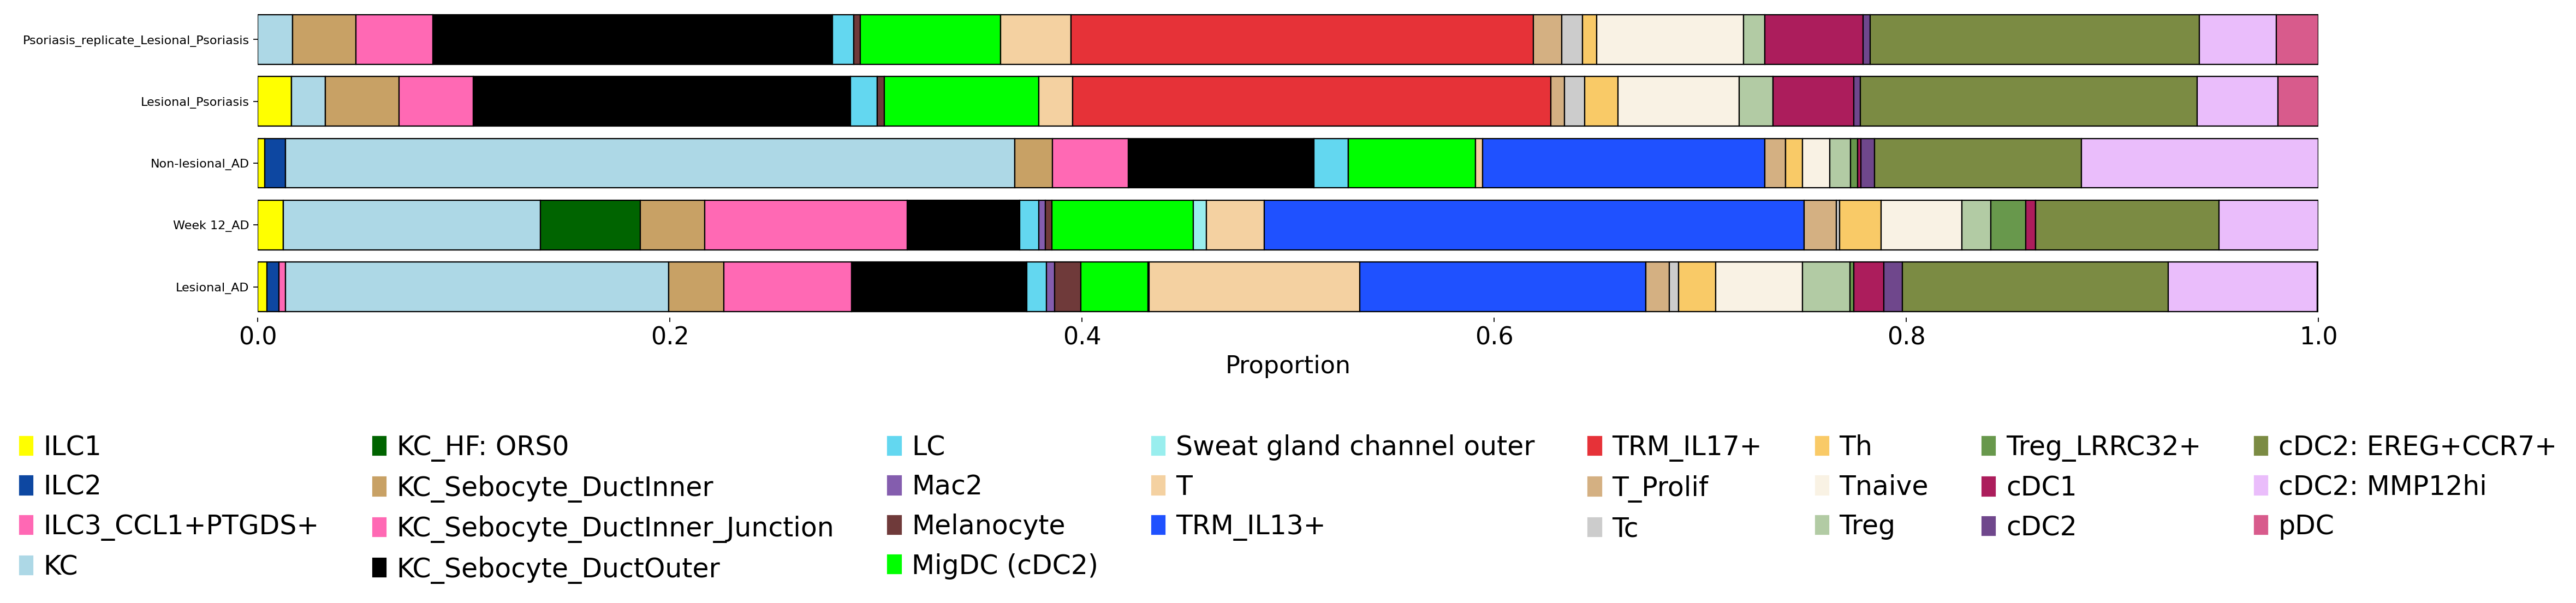

In [49]:
# Your explicit row order
# desired_row_order = ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']

# desired_row_order=desired_row_order[::-1]


# df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_overall_proportions2.pdf")
plt.show()



/tmp/ipykernel_3043561/3490903824.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


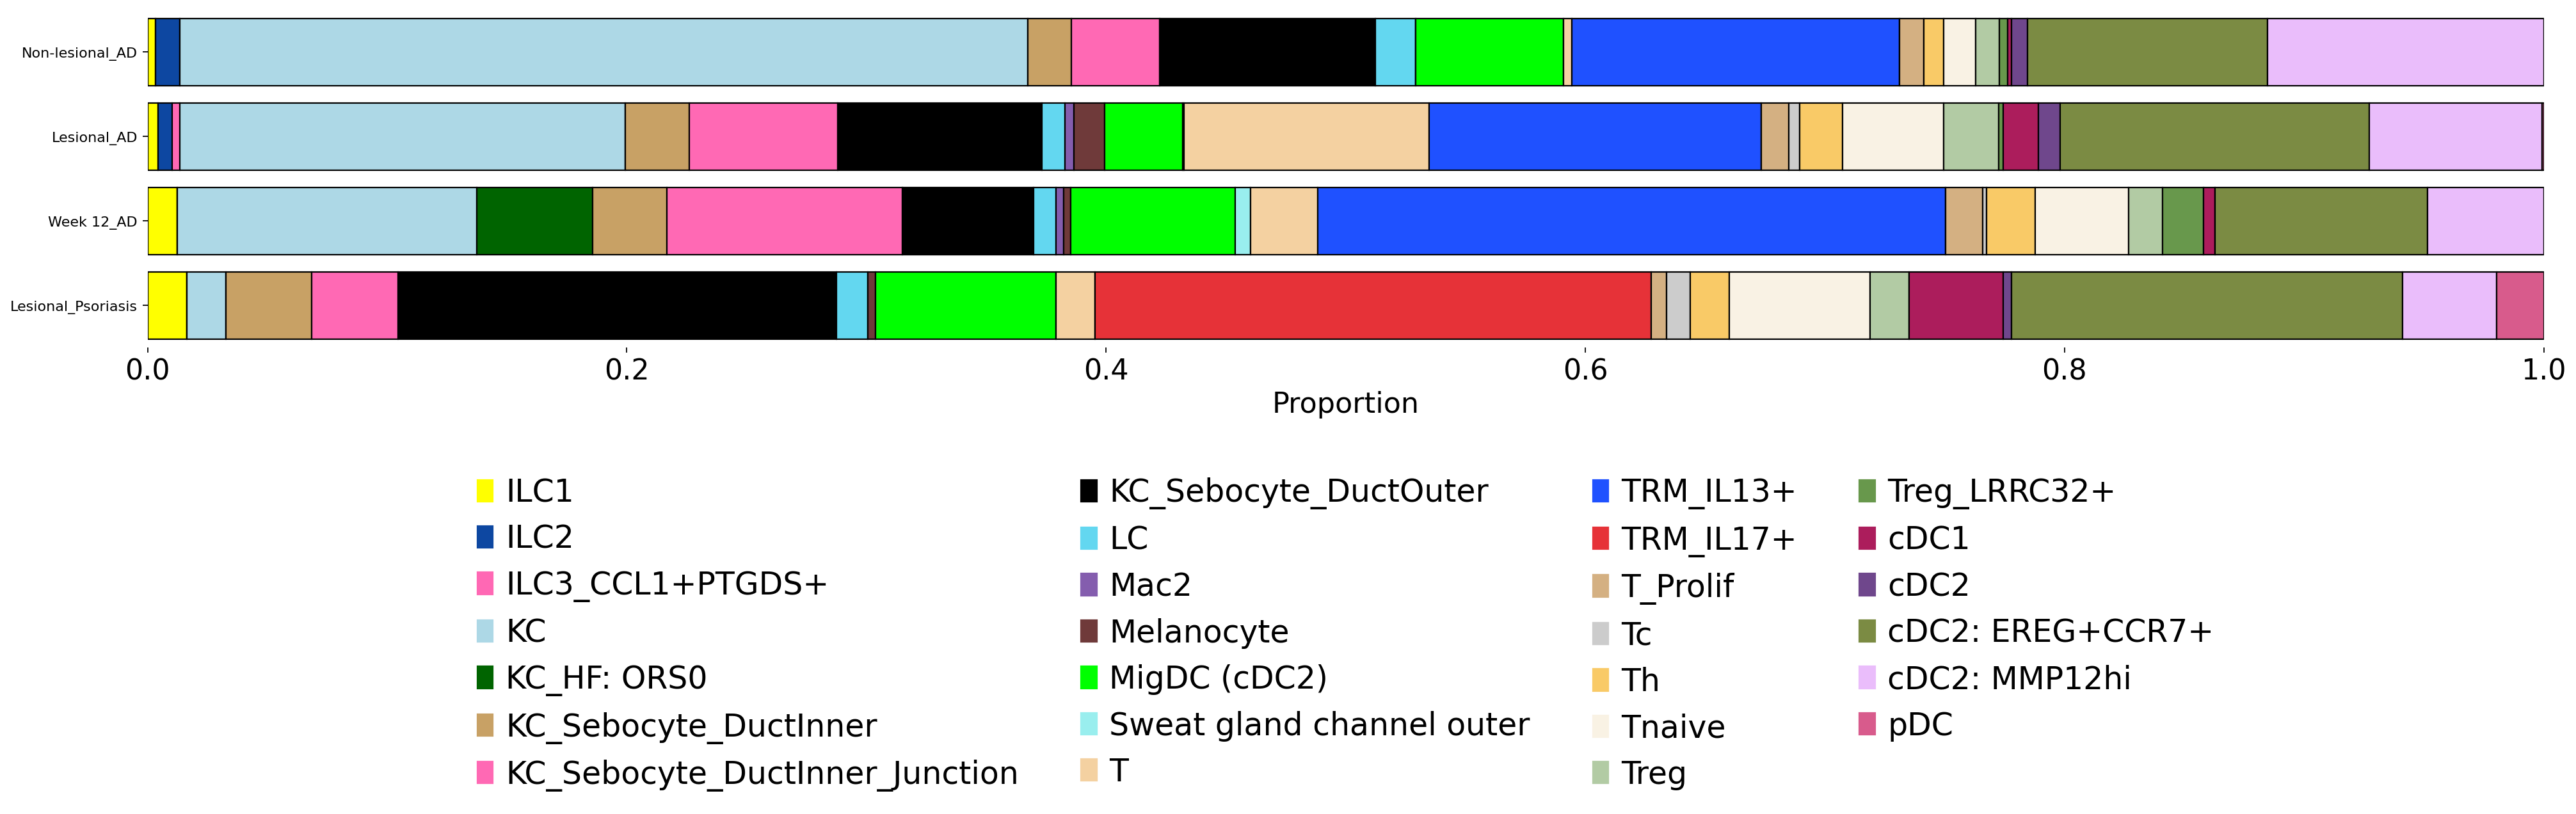

In [50]:
# Your explicit row order
desired_row_order = [ 'Non-lesional_AD', 'Lesional_AD',
 'Week 12_AD',
 'Lesional_Psoriasis',
# 'Psoriasis_replicate_Lesional_Psoriasis'
                    ]
desired_row_order = desired_row_order[::-1]

# Reindex df to match row order
df = df.reindex(desired_row_order)


# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=4,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_overall_proportions3.pdf")
plt.show()



In [51]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
import matplotlib.gridspec as gridspec


In [ ]:
adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == "AD"]
adata_5k_iii=adata_5k_iii[adata_5k_iii.obs["Site_status"].isin(["Lesional", "Week 12"])]
ANNOTATION="lvl5_annotation"
counts = (
    adata_5k_iii.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count")
#data = data[data.index.isin(ANNOTATION_ORDER)]
#data = data.reindex(index=ANNOTATION_ORDER).fillna(0)
#data = data.reindex(columns=desired_order).fillna(0)

# normalize by row if desired (optional)
data_prop = data.div(data.sum(axis=1), axis=0)

# melt into long-form for plotting
plot_df = data.reset_index().melt(id_vars=ANNOTATION, 
                                  var_name="Site_status", 
                                  value_name="count")

fig = plt.figure(figsize=(2,20))
gs = gridspec.GridSpec(2, 2, height_ratios=[0.2, 4], width_ratios=[4, 0.2],
                       hspace=0.05, wspace=0.05)

ax_colbar = fig.add_subplot(gs[0,0])
ax_empty  = fig.add_subplot(gs[0,1])
ax_dot    = fig.add_subplot(gs[1,0])
ax_rowbar = fig.add_subplot(gs[1,1])

ax_empty.axis('off')

# top bar (total per niche)
col_counts = data.sum(axis=0)
xx = np.arange(len(col_counts))
ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
ax_colbar.set_xlim(0, len(col_counts))
ax_colbar.axis('off')

# dotplot
for i, celltype in enumerate(data.index):
    for j, niche in enumerate(data.columns):
        val = data.loc[celltype, niche]
        if val > 0:
            ax_dot.scatter(
                j+0.5, i+0.5,
                s=val/np.max(data.values)*500,   # scale dot size
                c=plt.cm.Blues(val/np.max(data.values)),  # color scale
                edgecolor="k"
            )

ax_dot.set_xticks(xx+0.5)
ax_dot.set_xticklabels(data.columns, rotation=90, fontsize=12)
ax_dot.set_yticks(np.arange(len(data.index))+0.5)
ax_dot.set_yticklabels(data.index, fontsize=12)
ax_dot.invert_yaxis()  # so row order matches heatmap style
ax_dot.set_xlim(0, len(data.columns))
ax_dot.set_ylim(0, len(data.index))

# if disease == "AD":
#     ax_dot.set_ylabel("Cell type", fontsize=14)
# else:
#     ax_dot.set_ylabel(" ", fontsize=1)

# side bar (total per cell type)
row_counts = data.sum(axis=1)
yvals = np.arange(len(row_counts))
ax_rowbar.barh(yvals, row_counts.values, color='gray', height=1, align='edge')
ax_rowbar.set_ylim(0, len(row_counts))
ax_rowbar.invert_yaxis()
ax_rowbar.axis('off')

plt.tight_layout()
#plt.savefig(f"fig3_{disease}_dotplot.pdf", dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Subset data
adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == "AD"]
adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["Site_status"].isin(["Lesional", "Week 12"])]

ANNOTATION = "lvl5_annotation"

# Count occurrences
counts = (
    adata_5k_iii.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

# Pivot into matrix (rows = annotation, cols = site status)
data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count").fillna(0)

# Normalize by row (optional)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

# --- Figure setup (horizontal orientation) ---
fig = plt.figure(figsize=(20, 4))
gs = gridspec.GridSpec(
    2, 2,
    height_ratios=[4, 0.2],   # flip height ratios
    width_ratios=[0.2, 4],    # flip width ratios
    hspace=0.05, wspace=0.05
)

ax_rowbar = fig.add_subplot(gs[0,0])  # per site status
ax_empty  = fig.add_subplot(gs[1,0])
ax_dot    = fig.add_subplot(gs[0,1])
ax_colbar = fig.add_subplot(gs[1,1])

ax_empty.axis('off')

# left bar (total per site status)
row_counts = data.sum(axis=1)
yvals = np.arange(len(row_counts))
ax_rowbar.barh(yvals, row_counts.values, color='gray', height=1, align='edge')
ax_rowbar.set_ylim(0, len(row_counts))
ax_rowbar.invert_yaxis()
ax_rowbar.axis('off')

# dotplot (horizontal, with min dot size)
for i, site_status in enumerate(data.columns):
    for j, celltype in enumerate(data.index):
        val = data.loc[celltype, site_status]
        if val > 0:
            dot_size = max(val/np.max(data.values)*500, 30)  # enforce minimum size
            ax_dot.scatter(
                j+0.5, i+0.5,
                s=dot_size,
                c=plt.cm.Reds(val/np.max(data.values)),
                edgecolor="k"
            )

# format axes
ax_dot.set_xticks(np.arange(len(data.index))+0.5)
ax_dot.set_xticklabels(data.index, rotation=90, fontsize=12)
ax_dot.set_yticks(np.arange(len(data.columns))+0.5)
ax_dot.set_yticklabels(data.columns, fontsize=12)
ax_dot.set_xlim(0, len(data.index))
ax_dot.set_ylim(0, len(data.columns))
ax_dot.invert_yaxis()

# remove grid + spines
ax_dot.grid(False)
for spine in ax_dot.spines.values():
    spine.set_visible(False)

# bottom bar (total per cell type)
col_counts = data.sum(axis=0)
xx = np.arange(len(col_counts))
ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
ax_colbar.set_xlim(0, len(col_counts))
ax_colbar.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Subset data
adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == "AD"]
adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["Site_status"].isin(["Lesional", "Week 12"])]

ANNOTATION = "lvl5_annotation"

# Count occurrences
counts = (
    adata_5k_iii.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

# Pivot into matrix (rows = annotation, cols = site status)
data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count").fillna(0)

# Optional: normalize by row (proportions instead of raw counts)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

# --- Plot heatmap ---
plt.figure(figsize=(2, 15))
sns.heatmap(
    data_prop,            # or `data` if you want raw counts
    cmap="Reds",          # use red color scale
    linewidths=0,         # no gridlines
    cbar_kws={"label": "Proportion of cells"}
)

# Remove title
plt.title("")

plt.xlabel("Site status", fontsize=12)
plt.ylabel("Cell type", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
adata_5k_iii.obs.lvl5_annotation.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Subset data
adata_5k_iii = adata_5k_i[adata_5k_i.obs["Site_status"] == "Lesional"]
#adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["Site_status"].isin(["Lesional", "Week 12"])]

ANNOTATION = "lvl5_annotation"

# Count occurrences
counts = (
    adata_5k_iii.obs
    .groupby(["disease_overall", ANNOTATION])
    .size()
    .reset_index(name="count")
)

# Pivot into matrix (rows = annotation, cols = site status)
data = counts.pivot(index=ANNOTATION, columns="disease_overall", values="count").fillna(0)

# Normalize by row (proportions instead of raw counts)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

# --- Plot heatmap (horizontal orientation) ---
plt.figure(figsize=(15, 1))  # wide and short

ax = sns.heatmap(
    data_prop.T,       # transpose so x=cell types, y=site status
    cmap="Reds",
    linewidths=0,      # remove gridlines
    cbar_kws={"label": "Proportion of cells"}
)

# Remove title
plt.title("")

# Axis labels
plt.xlabel("Cell type", fontsize=12)
plt.ylabel("Site status", fontsize=12)

# Kill any background grid
ax.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Subset data
adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == "AD"]
adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["niche19"] == "Sebaceous_immune"]

adata_5k_iii = adata_5k_iii[adata_5k_iii.obs["Site_status"].isin(["Lesional", "Week 12"])]

ANNOTATION = "lvl5_annotation"

# Count occurrences
counts = (
    adata_5k_iii.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

# Pivot into matrix (rows = annotation, cols = site status)
data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count").fillna(0)

# Normalize by row (proportions instead of raw counts)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

# --- Plot heatmap (horizontal orientation) ---
plt.figure(figsize=(15, 1))  # wide and short

ax = sns.heatmap(
    data_prop.T,       # transpose so x=cell types, y=site status
    cmap="Reds",
    linewidths=0,      # remove gridlines
    cbar_kws={"label": "Proportion of cells"}
)

# Remove title
plt.title("")

# Axis labels
plt.xlabel("Cell type", fontsize=12)
plt.ylabel("Site status", fontsize=12)

# Kill any background grid
ax.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
adata_5k_iii.obs["Site_status"].value_counts()

In [ ]:
adata_5k_iii.obs["niche19"].value_counts()

In [ ]:
adata_5k_iii.obs["disease_overall"].value_counts()

In [ ]:
ALLT = {#'Conventional': ['CD3D', ],
#               'Treg': ['FOXP3', 'TIGIT',  "IL2RA"],
#          "Activated_Treg": ["LRRC32", "IL1R1","IL1R2", "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A", 
#                             #"NRP1"

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#               'CTLA4',],
 'Naive': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
#  'Th': [ "CD4", 'CD40LG', "MCAM", "CCR6", "BACH2"],
#                   "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],

#  'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',#"GZMH", "CXCR3", 
#                              "CCL4", "CCL3", #"CCL3L1"# "MCOLN1"
#                             ],
         "Tissue-residency\n markers": ["ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
        # "NBAS", 
         'CCL1', #"CCL17", 
         "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
        ],
#  'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
#          "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
#             'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
#          ],
#          "Other": [    "PTPN13","ITGA1"],
#          # "ITGA1hi": ["ITGA1", 
#          #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
#          #             'BICD1',#'MVB12B', 
#          #             'PRR5L', # 'PCNX4', 'EPHA4', 
#          #             'ST8SIA1', 
#          #             'ZNF407',],
#          #"Memory": ["CD69",],
#               'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
#                              "NSG1", #"LINC02446","CD9", 
#                               "MPZL2", "KLRC2"], #'TRGC2', 
#              "Innate": [ "KLRC2", 'KLRC3', 
#                         "KLRB1", "KIT", "KLRC1","TYROBP", "FCER1G",],
               
#                "NK": [ "TBX21",#
#                       "NCR1",#'NMUR1', "NMU",
#                       "B3GAT1", 
#                       "PTGDS",
#                       "CX3CR1", # 
#                       "CCL4L2", #
#                     #
#                       "PRSS23", "CD160", #
#                       "KLRF1", "KLRG1","S100B",
                             
#                       #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
#                      # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
#                               ],
#                       "NK+ILC1": ["KLRD1","NCAM1", "PRF1", "CEBPD"  #"IL15",
#                                  ],
#    'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
#                #"IL18", 
#                "ADGRG3", #"CXCR3",
#                "P2RX7"
#               ],
#                "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" , "CCL17"],

#                "ILC3": ["ID3", #"ZNF683",
#                         "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
#                        ], #'TNF', "CCR8", "CD9"],

#                 "ILC2+3": ["IL9R", "TNFSF11"],
#  'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
#           #"CALCRL", "HPGDS" ,  "S1PR1",
#          ],
#       'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
#                             "IL18R1", "PPARG",
#                             "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
#                             "PLA2G4A", "IL4", "IL31",
#                            "ICOS", "NRROS"
#                            ],
         "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
        
               }



sc.pl.dotplot(adata_5k_iii[adata_5k_iii.obs["lvl5_annotation"].str.startswith("TRM_IL13+")], #adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT),
              groupby="Site_status",
              dendrogram=False, 
            #standard_scale="var",
              dot_max=0.3,
              title="TRM",
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

sc.pl.dotplot(adata_5k_iii[adata_5k_iii.obs["lvl5_annotation"]=="T"], #adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT),
              groupby="Site_status",
              dendrogram=False, 
            #standard_scale="var",
              dot_max=0.3,
              title="T"
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )
adata_5k_iiii=adata_5k_iii[adata_5k_iii.obs["lvl5_annotation"].str.startswith("T")]
adata_5k_iiii.obs["lvl5_annotation2"]=adata_5k_iiii.obs["lvl5_annotation"].astype(str) + "_" + adata_5k_iiii.obs["Site_status"].astype(str)

sc.pl.dotplot(adata_5k_iiii,
              remove_markers(ALLT),
              groupby="lvl5_annotation2",
              dendrogram=False, 
            #standard_scale="var",
              dot_max=0.3,
              #title="T"
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
adata_5k_i.obs["lvl5_annotation"].value_counts()

In [ ]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", "APOBEC3D", "GZMA", 'GZMK', 'OASL',  "CXCR3", 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1', 'IL1RN', 'PTGS1', 'PTP4A1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             


sc.pl.dotplot(adata_5k_i, 
              remove_markers(ALLT2),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,
           # categories_order = ['NK', 'ILC1/NK', 'ILC1',  'ILC3', 'ILC3_CCL1+PTGDS+', 'ILC_prolif', 'ILC2',]

              
             )



In [ ]:

sc.pl.dotplot(adata_5k_iii,
              remove_markers(["CXCR3", "CXCR6"]),
              groupby="lvl5_annotation",
              dendrogram=False, 
            #standard_scale="var",
              dot_max=0.3,
              #title="T"
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:

# # Your explicit row order
# desired_row_order = [ 'Lesional Baseline_Psoriasis', 'Lesional Baseline_AD', 'Week 12_AD',]

# desired_row_order=desired_row_order[::-1]


# df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(22, 4))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=18
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_overall_proportions4.pdf")
plt.show()

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["Site_status"]=="Lesional"]
adata_5k_i= adata_5k_i[adata_5k_i.obs["disease_overall"]=="Psoriasis"]
adata_5k_i.obs.info_id6.value_counts()

In [ ]:
adata_5k_i.obs.lvl5_annotation.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your explicit row order
# desired_row_order = [ 'Lesional Baseline_Psoriasis', 'Lesional Baseline_AD', 'Week 12_AD',]

# desired_row_order=desired_row_order[::-1]


# df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.01).any(axis=0)]
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(22, 4))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=18
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_overall_proportions5.pdf")
plt.show()

In [ ]:
lvl5_labels

In [ ]:
# 

In [ ]:
# stop

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define desired cell type order
desired_order = [
    'KC_Sebocyte_DuctOuter', 'KC_Sebocyte_DuctInner', 'KC_Sebocyte_DuctInner_Junction','KC1', 'KC2',
    'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer',
    'Melanocyte', 'TRM_IL13+', 'TRM_IL17+', 'T_Prolif', 'Th','Th_PPARGhi',
    'Tnaive', 'Treg', 'Treg_LRRC32+','T', 'ILC1','ILC2', 'ILC3_CCL1+PTGDS+',
    'MigDC (cDC2)', 'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
    'cDC1', 'LC','cDC2: EREG+CCR7+', 'pDC', 'Melanocyte','Nonspecific', 'TransitionalDC', 'KC'
]

In [ ]:


# Get initial row order and sample IDs
sample_ids = df.index.tolist()

# Filter and order columns
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]

# Normalize rows to sum to 1
df = df.div(df.sum(axis=1), axis=0)

# Row reordering (custom order)
row_order = [3, 2, 4, 0, 1]
if len(row_order) == len(df):
    df = df.iloc[row_order, :]
    sample_ids = df.index.tolist()
else:
    print("Mismatch # rows. Not reordered")

# Define color list
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Convert to NumPy array for efficient stacking
values_matrix = df.values
n_samples, n_celltypes = values_matrix.shape
bottom = np.zeros(n_samples)

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
y_pos = np.arange(n_samples)

for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    heights = values_matrix[:, i]
    ax.barh(
        y=y_pos,
        width=heights,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom += heights

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(sample_ids, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

# Axis formatting
ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(sample_ids) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend below
ax.legend(
    handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("fig4/sebaceous_immune_proportions5.pdf")
plt.show()

In [ ]:
# stop

# show niches§m

In [ ]:
HIGHLIGHT_COLOR = "#ff6145"     # Red, as an example
OTHER_COLOR = "#ededed"         # Very light grey

NICHE="Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))

adata_5k_i = adata_5k  # Filter as you need

sample_counts = adata_5k_i.obs["info_id6"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

SEB_SAMPLES = []
for i, DONOR_ID in enumerate(samples_to_keep):
    adata_i = adata_5k_i[adata_5k_i.obs["info_id6"] == DONOR_ID]
    print(i+1, "/", len(samples_to_keep))
    STATUS = adata_i.obs["Site_status"].unique()[0]
    TIMEPOINT = adata_i.obs["Timepoint"].unique()[0]
    DONOR = adata_i.obs["Sanger patient ID"].unique()[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    niche_names_found = adata_i.obs[NICHE_COLUMN].unique()
   
    if NICHE in niche_names_found:
        adata_ii = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
        CELL_COUNT = adata_ii.shape[0]
        print("Cell count for slide: ", CELL_COUNT)
        print()
        if CELL_COUNT > 10:
            # 1. Make new obs column
            adata_i.obs[NICHE_COLUMN + "_highlight"] = adata_i.obs[NICHE_COLUMN].apply(
                lambda x: NICHE if x == NICHE else "Other"
            )
            # 2. Force categorical with desired order!
            adata_i.obs[NICHE_COLUMN + "_highlight"] = pd.Categorical(
                adata_i.obs[NICHE_COLUMN + "_highlight"],
                categories=[NICHE, "Other"],
                ordered=True
            )
            # 3. Palette as a list, not a dict
            palette = [HIGHLIGHT_COLOR, OTHER_COLOR]
            from matplotlib.colors import ListedColormap

            palette = ListedColormap([HIGHLIGHT_COLOR, OTHER_COLOR])
            # 4. Plot
            SEB_SAMPLES.append(DONOR_ID)
            print(DONOR_ID)
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color=NICHE_COLUMN + "_highlight",
                palette=palette,
                size=40,
                vmax=1,
                title='',
                #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
                edgecolor='black',
                linewidth=0.1,
                legend_loc=None,
                save=f"sebimmune_nicheonly_{DONOR_ID}.pdf"
                # ax=ax,
                # legend_loc="on data"
            )

# Epidermal basal immune + sebaceous

# SHOW MIGDC + ILC

In [ ]:
# # ------------------------------------------------------------
# # Highlight 2 niches in each slide:
# #     • “Sebaceous_immune”  → orange-red   (#ff6145)
# #     • “Tzone-like”        → purple       (#845DAE)
# # every other spot gets light grey.
# # ------------------------------------------------------------
# import pandas as pd
# import squidpy as sq
# from matplotlib.colors import ListedColormap

# # ---- constants --------------------------------------------------------------
# TARGET_NICHES   = ["Epidermis_basal_immune", "Tzone-like"]
# NICHE_COLUMN    = "niche12"
# COLOR_MAPPING   = {
#     "Epidermis_basal_immune": "#ff6145",   # orange-red
#     "Tzone-like":       "#845DAE",   # purple
#     "Other":            "#ededed",   # very light grey
# }
# MIN_CELL_COUNT  = 10                # only show slides with ≥ 10 target cells

# sc.settings.set_figure_params(
#     dpi=100, facecolor="white", frameon=False, figsize=(18, 18)
# )

# # ---- iterate over slides ----------------------------------------------------
# adata_all = adata_5k                    # rename for clarity
# sample_sizes = adata_all.obs["sample_id"].value_counts()
# slides_to_plot = sample_sizes[sample_sizes > 100].index  # optional quality filter

# print("Highlighting:", ", ".join(TARGET_NICHES))
# for i, slide_id in enumerate(EPI_SAMPLES + SEB_SAMPLES, 1):
#     adata_i = adata_all[adata_all.obs["info_id2"] == slide_id]

#     # skip slide if it contains none of the target niches
#     if not set(adata_i.obs[NICHE_COLUMN].unique()).intersection([ "Sebaceous_immune"]):
#         continue

#     # ----------------------------------------------------------------
#     # Build highlight column  **(add “Other” category first)**
#     # ----------------------------------------------------------------
#     annos = adata_i.obs[NICHE_COLUMN]
#     if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
#         annos = annos.cat.add_categories(["Other"])

#     highlight = annos.where(annos.isin(TARGET_NICHES), "Other")
#     highlight = pd.Categorical(
#         highlight,
#         categories=TARGET_NICHES + ["Other"],
#         ordered=True,
#     )
#     adata_i.obs["niche12_highlight"] = highlight

#     # how many target cells?
#     n_target = (highlight != "Other").sum()
#     if n_target < MIN_CELL_COUNT:
#         continue

#     # ----------------------------------------------------------------
#     # palette must follow the category order we just set
#     # ----------------------------------------------------------------
#     palette = ListedColormap([COLOR_MAPPING[c] for c in highlight.categories])

#     # ----------------------------------------------------------------
#     # Plot
#     # ----------------------------------------------------------------
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         shape=None,
#         color="niche12_highlight",
#         palette=palette,
#         size=40,
#         vmax=1,
#         edgecolor="black",
#         linewidth=0.1,
#         title=f"{slide_id}   n={n_target}",
#         legend_loc=None,            # remove legend – set to "right" if you want it
#     )

#     # break after first example?  comment out if you want all
#     # if i == 1:
#     #     break

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np               # (only if you use np later)

# # ---------------------------------------------------------------
# # PARAMETERS
# # ---------------------------------------------------------------
# NICHES = ["Sebaceous_immune", "Epidermis_basal_immune"]   # ← both labels
# NICHE_COLUMN   = "niche12"
# MIN_CELLS_IN_SAMPLE = 100        # skip slides with fewer cells in that niche
# MIN_TOTAL_CELLS    = 100         # skip slides with <100 total cells
# CELLTYPE_COLUMN    = "lvl4_annotation"

# sc.settings.set_figure_params(dpi=100, facecolor="white",
#                               frameon=False, figsize=(14, 8))

# adata_5k_i = adata_5k.copy()      # filter further if you wish

# # ---------------------------------------------------------------
# # WHICH SAMPLES TO KEEP (≥ 100 total cells)
# # ---------------------------------------------------------------
# sample_counts   = adata_5k_i.obs["sample_id"].value_counts()
# samples_to_keep = sample_counts[sample_counts > MIN_TOTAL_CELLS].index

# # ---------------------------------------------------------------
# # BUILD A LIST OF ROW-DICTS
# # ---------------------------------------------------------------
# rows = []
# for sid in samples_to_keep:
#     adata_s   = adata_5k_i[adata_5k_i.obs["sample_id"] == sid]
    
#     # Does the slide contain at least one of the two niches?
#     if not np.isin(adata_s.obs[NICHE_COLUMN].unique(), NICHES).any():
#         continue
    
#     # Keep only the cells belonging to either niche
#     adata_niche = adata_s[adata_s.obs[NICHE_COLUMN].isin(NICHES)]
    
#     if adata_niche.shape[0] < MIN_CELLS_IN_SAMPLE:
#         #print("small niche: ", adata_niche.shape[0], sid)
#         continue
    
#     # Normalised counts of lvl4 cell-types within the selected niche(s)
#     lvl_counts = adata_niche.obs[CELLTYPE_COLUMN].value_counts(normalize=True)
    
#     row = lvl_counts.to_dict()
#     row["sample_id"] = sid
#     rows.append(row)

# # Assemble into a DataFrame, `rows` may be empty if nothing passed the filters
# plot_df = pd.DataFrame(rows).fillna(0)
# df=plot_df

In [ ]:
# desired_order=[ 'KC_Sebocyte_DuctOuter', 'KC_SebocyteDuct_Outer',  'KC_Sebocyte_DuctInner', 'KC_SebocyteDuct_Inner', 'KC_Sebocyte_DuctInner_Junction','KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
#  'Melanocyte',
#  'TRM_IL13+',
#      'TRM_IL17+',
    
#      'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

#         'ILC1','ILC2',
#     'ILC3_CCL1+PTGDS+',

#     'MigDC (cDC2)',
#     'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC1',






#  'LC','cDC2: EREG+CCR7+',
#  'pDC',
    
# 'Melanocyte','Nonspecific', 
#                'KC_HF: ORS0', 'KC_HF: ORS1', 'KC_HF: ORS_cycling','Sweat gland channel outer', 'Mac','Tc', 'F2: Universal',

# ]

In [ ]:
# desired_order = desired_order + ["Mac"]

In [ ]:
# i=0
# for x in data[0].keys():
#     if x not in desired_order:
#         if x not in ["sample_id", "info_id2", "seb_immune"]:
#             i+=1
#             print(x)
#    # else:
#    #     print("found", x)
# if i!=0:
#     stop

In [ ]:



# # First, get only the columns in your desired order that actually exist
# lvl5_labels = [x for x in desired_order if x in df.columns]
# df = df[lvl5_labels]

# # Then, drop cell types never >2% in any sample
# df = df.loc[:, (df > 0.02).any(axis=0)]

# # Renormalize so that rows sum to 1
# df = df.div(df.sum(axis=1), axis=0)

# sample_ids = df.index.tolist()
# lvl5_labels = df.columns.tolist()  # update after filtering
# bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# #row_order = [ 1, 2,  3,0, 4]
# #df = df.iloc[row_order, :]
# sample_ids = df.index.tolist() 

# #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

# # Plot
# fig, ax = plt.subplots(figsize=(30, 5))
# bottom = [0] * len(sample_ids)
# y_pos = range(len(sample_ids))
# for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
#     values = df[cell_type].values
#     ax.barh(
#         y=y_pos,
#         width=values,
#         left=bottom,
#         color=color,
#         edgecolor='black',
#         height=0.8,
#         label=cell_type
#     )
#     bottom = [b + v for b, v in zip(bottom, values)]

# # Add cell type label if >1% (optional)
# # for j, sid in enumerate(sample_ids):
# #     left = 0
# #     for i, cell_type in enumerate(lvl5_labels):
# #         frac = df.iloc[j, i]
# #         if frac > 0.08:
# #             ax.text(left + frac/2, j, cell_type, ha='center', va='center', fontsize=12)
# #         left += frac

# #ax.set_yticks(list(y_pos))
# ax.set_yticks(range(len(sample_ids)))
# ax.set_yticklabels(range(len(sample_ids)))
# ax.set_yticklabels(sample_ids, fontsize=10)
# ax.tick_params(axis='x', labelsize=20)

# ax.set_xlabel("Proportion", fontsize=20)
# ax.set_title(f"")
# ax.set_xlim(0, 1)
# ax.set_ylim(-0.5, len(sample_ids)-0.5)
# ax.grid(False)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# # No legend (comment out below to add one)
# # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9, title="lvl5_annotation")

# # ... [your plotting code above, unchanged] ...

# # Add legend *below* the plot with 4 columns
# ax.legend(
#     handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
#     labels=lvl5_labels,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.3),
#     ncol=8,
#     frameon=False,
#     fontsize=22,
#     title="",
#     title_fontsize=0
# )


# plt.tight_layout()
# plt.subplots_adjust(bottom=0.25)  # increase if you need even more space

# plt.savefig("sebaceous_immune_PLUSEPIDEMRAL_proportions.pdf")
# plt.show()


# Epidermal basal immune

In [ ]:
# adata_5k.obs.niche12.value_counts()

In [ ]:
# """
# find niche
# """
# import warnings
# NICHE = "Epidermis_basal_immune"#"Epidermis_Inflamm_immune"
# print(NICHE)

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
# sample_counts = adata_5k_i.obs["sample_id"].value_counts()
# samples_to_keep = sample_counts[sample_counts > 100].index


# ORDER = []
# for i,DONOR_ID in enumerate(samples_to_keep):
#     print(i+1, "/", len(samples_to_keep))
#     adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
#     DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.info_id.unique())[0]
#     niche_names_found = adata_i.obs["niche12"].unique()
   
#     if NICHE in niche_names_found:
#        # print("found")
#         adata_ii =  adata_i[adata_i.obs["niche12"]==NICHE]
#         CELL_COUNT = adata_ii.shape[0]
#         print("Cell count for slide: ", CELL_COUNT)
#         print()
#         if CELL_COUNT > 10:
#     #         if i ==0:
#             print(DONOR_ID)
#             if DONOR == "BK25":
#                 sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="lvl5_annotation",
#                 size=20,
#                 vmax=1,
#                 title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                 edgecolor='black',
#                 linewidth=0.08,
#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )       
#             else:
#                 sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="lvl5_annotation_new",
#                     size=6,
#                     vmax=1,
#                     title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                     edgecolor='black',
#                     linewidth=0.08,
#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )
#                 sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="niche12",
#                     size=6,
#                     vmax=1,
#                     title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                     edgecolor='black',
#                     linewidth=0.08,
#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )       
#             i=i+1




# TRM plot

In [ ]:
# 1. compute per-slide TRM fractions ...........................
mask_trm = adata_5k.obs["lvl5_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
            .groupby(["info_id6", "niche18"])
            .agg(total_cells=("is_TRM", "size"),
                 trm_cells  =("is_TRM", "sum"))
            .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# 2. mean ± SEM per niche .....................................
stats = (
    df.groupby("niche18")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
      .sort_values("mean", ascending=False)          # ⇦ sort high→low
)

# 3. plot .....................................................
plt.figure(figsize=(10, 6))
sns.barplot(
    data=stats,
    x="niche18",
    y="mean",
    order=stats["niche18"],                          # ⇦ keep that order
    yerr=stats["sem"],
    color="#f87a7b"
)

ax = plt.gca()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90, ha="center")
plt.xlabel("Niche", labelpad=6)
plt.ylabel("Fraction of TRM cells", labelpad=6)
plt.title("")
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------------
# 1  Compute per-slide TRM fractions
# --------------------------------------------------
mask_trm = adata_5k.obs["lvl5_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
        .groupby(["info_id6", "niche18"])
        .agg(total_cells=("is_TRM", "size"),
             trm_cells  =("is_TRM", "sum"))
        .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# --------------------------------------------------
# 2  Mean ± SEM per niche
# --------------------------------------------------
stats = (
    df.groupby("niche18")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
      .sort_values("mean", ascending=False)
)

# keep only the top-7 niches
stats_top = stats.head(7)

# --------------------------------------------------
# 3  Plot
# --------------------------------------------------
plt.figure(figsize=(3, 6))
sns.barplot(
    data=stats_top,
    x="niche18",
    y="mean",
    order=stats_top["niche18"],   # preserve the sorted order
    yerr=stats_top["sem"],
    color="#f87a7b",
    width=0.6                     # <-- narrower bars (default ≈ 0.8)
)

ax = plt.gca()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90, ha="center")
plt.xlabel("Niche", labelpad=6)
plt.ylabel("Fraction of TRM cells", labelpad=6)
plt.title("")                    # no title
plt.tight_layout()
plt.show()

In [ ]:

# --------------------------------------------------
# 1  Compute per-slide TRM fractions
# --------------------------------------------------
mask_trm = adata_5k.obs["lvl5_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
        .groupby(["info_id6", "niche18"])
        .agg(total_cells=("is_TRM", "size"),
             trm_cells  =("is_TRM", "sum"))
        .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# --------------------------------------------------
# 2  Mean ± SEM per niche (in %)
# --------------------------------------------------
stats = (
    df.groupby("niche18")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
)
stats["mean"] *= 100  # convert to percent
stats["sem"]  *= 100

stats = stats.sort_values("mean", ascending=False)
stats_top = stats.head(7)

# --------------------------------------------------
# 3  Plot (horizontal + x-axis on top)
# --------------------------------------------------
plt.figure(figsize=(7, 3))
sns.barplot(
    data=stats_top,
    x="mean",
    y="niche18",
    order=stats_top["niche18"],
    xerr=stats_top["sem"],
    color="#f87a7b",
    width=0.6
)

ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.xlabel("TRM cells (%)", labelpad=6)
plt.ylabel("", labelpad=6)
plt.tight_layout()
plt.show()

# check ILC identity

In [ ]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", "APOBEC3D", "GZMA", 'GZMK', 'OASL',  "CXCR3", 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1', 'IL1RN', 'PTGS1', 'PTP4A1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(ALLT2),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

#              )


sc.pl.dotplot(adata_5k_i, 
              remove_markers(ALLT2),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,
           # categories_order = ['NK', 'ILC1/NK', 'ILC1',  'ILC3', 'ILC3_CCL1+PTGDS+', 'ILC_prolif', 'ILC2',]

              
             )



In [ ]:
stop

In [ ]:
adata_ii=adata_5k[adata_5k.obs["sample_id"]=="output-XETG00272__0027175__Region_6__20240628__124459"]
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KIT",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )   
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="GZMK",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )   
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KLRC1",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )     
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="PIK3R1",
                    size=30,
                    vmax=.3,
                    #title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )       
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KIR2DL4",
                    size=30,
                    vmax=.3,
                    #title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )       

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Epidermis_basal_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i = adata_5k  # filter as needed

# Which samples to plot
sample_counts = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

# Build list of dicts for easy DataFrame assembly
data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche12"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche12"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl4_annotation"].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["info_id2"] = DONOR_ID
    print(DONOR_ID)
    data.append(row)

df = pd.DataFrame(data).fillna(0).set_index("info_id2")


# First, get only the columns in your desired order that actually exist
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]

# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.0).any(axis=0)]

# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

sample_ids = df.index.tolist()
lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 1, 2,  3,0]
# df = df.iloc[row_order, :]
sample_ids = df.index.tolist() 

#bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(sample_ids)
y_pos = range(len(sample_ids))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Add cell type label if >1% (optional)
# for j, sid in enumerate(sample_ids):
#     left = 0
#     for i, cell_type in enumerate(lvl5_labels):
#         frac = df.iloc[j, i]
#         if frac > 0.08:
#             ax.text(left + frac/2, j, cell_type, ha='center', va='center', fontsize=12)
#         left += frac

#ax.set_yticks(list(y_pos))
ax.set_yticks(range(len(sample_ids)))
ax.set_yticklabels(range(len(sample_ids)))
ax.set_yticklabels(sample_ids, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_title(f"")
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(sample_ids)-0.5)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# No legend (comment out below to add one)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9, title="lvl5_annotation")

# ... [your plotting code above, unchanged] ...

# Add legend *below* the plot with 4 columns
ax.legend(
    handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22,
    title="",
    title_fontsize=0
)


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # increase if you need even more space

plt.savefig("fig4/EBI_immune_proportions.pdf")
plt.show()


In [ ]:
adata_5k[adata_5k.obs["lvl5_annotation_new3"].str.startswith("ILC3")].obs.niche12.value_counts()

In [ ]:
adata_5k[adata_5k.obs["niche12"].str.startswith("Epidermis_basal_imm")].obs.lvl5_annotation_new.value_counts()

In [ ]:
stop

DEGs for TRM vs ILC

In [ ]:
adata_ii=adata_5k[adata_5k.obs["sample_id"]=="output-XETG00272__0027175__Region_6__20240628__124459"]
adata_ii[adata_ii.obs["niche12"].str.startswith("Epidermis_basal_imm")].obs.lvl5_annotation_new3.value_counts()

In [ ]:
adata_5k.obs["niche12"].value_counts()

In [ ]:
CATEGORY="niche12"
import pandas as pd
sc.tl.rank_genes_groups(adata_5k, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_5k.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[17
                                     ]
                                     
print(select_population)
genes = [x for x in df2[select_population][:1000] if x.startswith("CCL") or x.startswith("CXCL")]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
print(genes)

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]
adata_5k_i.shape


In [ ]:
adata_5k_i.obs.Site_status.value_counts()

In [ ]:
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()


In [ ]:
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]


In [ ]:
adata_5k_i.obs.Timepoint2.value_counts()

In [ ]:
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()




In [ ]:
CATEGORY="seb_immune"
import pandas as pd
sc.tl.rank_genes_groups(adata_5k_i, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_5k_i.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[0
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k_i,
    genes0,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_5k_i,
    genes1,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
genes = [x for x in df2[select_population][:1000] if x.startswith("CCL") or x.startswith("CXCL")]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k_i,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)


In [ ]:

sc.pl.dotplot(
    adata_5k_i,
    genes2,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_5k_i,
    genes3,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
GENES = {"Seb_immune chemokines": ['CCL19', 'CXCL16', 'CCL17', 'CCL22', 'CXCL9', 'CXCL10',],
        "Timepoint chemokines": ['CX3CL1',
                                 #CXCL11, 
                                 'CCL20', 'CXCL11', 'CCL1', 'CSF2', ]
        }
all_genes = [gene for genes in GENES.values() for gene in genes]

sc.pl.dotplot(
    adata_5k_i,
    all_genes,
    groupby=CATEGORY,
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k,
    all_genes,
    groupby="niche12",
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)

In [ ]:
GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



In [ ]:
{x:[""] for x in adata_5k_i.obs["seb_immune"].unique()}

In [ ]:
SEB_IMMUNE = ['BK22_Lesional Baseline', 'Lesional_CE4-SKI-27-FO-4-S22-A2', 'BK51_wk8 Relapse', 'BK25_Week 12', 'output-XETG00155__0043604__BK25-SKI-27-FO-5-S3__20241010__133127']

adata_ii=adata_5k[adata_5k.obs["info_id2"].isin(SEB_IMMUNE)]
adata_iii=adata_ii[adata_ii.obs["niche12"]=="Sebaceous_immune"]
celltype_counts = adata_iii.obs["lvl5_annotation_new3"].value_counts()
celltypes_to_keep = celltype_counts[celltype_counts >= 5].index
adata_iii = adata_iii[adata_iii.obs["lvl5_annotation_new3"].isin(celltypes_to_keep)].copy()
adata_iii.shape

In [ ]:
CATEGORY="lvl5_annotation_new3"
import pandas as pd
sc.tl.rank_genes_groups(adata_iii, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_iii.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[0
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_iii,
    genes2,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_iii,
    genes3,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous gland_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14, 2))

adata_5k_i = adata_5k

sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

data = []
sample_ids = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["sample_id"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche11"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche11"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl5_annotation"].value_counts(normalize=True)
    data.append(lvl5_counts)
    sample_ids.append(DONOR_ID)

df = pd.DataFrame(data, index=sample_ids).T.fillna(0)
df = df.loc[(df > 0.01).any(axis=1)]  # keep only cell types >1% in any sample
lvl5_labels = df.index.tolist()
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

fig, ax = plt.subplots(figsize=(len(sample_ids)*0.28, 2))

bottom = [0]*len(sample_ids)
bars = []
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df.iloc[i].values
    bar = ax.bar(
        sample_ids,
        values,
        bottom=bottom,
        color=color,
        edgecolor='black',
        width=1,
        label=cell_type
    )
    bars.append(bar)
    bottom = [b + v for b, v in zip(bottom, values)]

# Set yticks as 0, 1, 2, ...
ax.set_yticks(range(len(sample_ids)))
ax.set_yticklabels(range(len(sample_ids)))

ax.set_xlim(-0.5, len(sample_ids)-0.5)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_xlabel("Sample index")
ax.set_ylabel("Sample number")
ax.set_title(f"{NICHE}: composition per sample", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)

# Legend below, 4 columns, no frame
ax.legend(
    bars,
    lvl5_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=4,
    frameon=False,
    fontsize=10,
    title="lvl5_annotation",
    title_fontsize=11
)

plt.tight_layout()
plt.show()


In [ ]:
[x for x in adata_5k.obs["lvl5_annotation"].unique() if x.startswith("ILC")]

# check ILC identity

In [ ]:
adata_ilc = adata_5k[(adata_5k.obs["lvl5_annotation_new"].str.startswith("ILC"))|
                    (adata_5k.obs["lvl5_annotation_new"].str.startswith("NK"))
                    ]

In [ ]:
# """
# pre-reintegration
# """
# #PATH ='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated9_fa5'
# """
# post
# """
# PATH='/nfs/team298/ls34/xenium_atlas/model_ALL_CLEAN_scanvi_ALL/adata_counts_integrated.h5ad.fa11'
# adata_5k.write(PATH)

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG"],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             
# sc.pl.dotplot(adata_ii, 
#               ALLT2,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

#              )


# sc.pl.dotplot(adata_5k_ii, 
#               remove_markers(ALLT2),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,
#             categories_order = ['NK',
# 'ILC1/NK','ILC2/3', 'ILC_prolif']

              
#              )



sc.pl.dotplot(adata_ilc, 
              remove_markers(ALLT2),
              groupby="lvl5_annotation_new",
              dendrogram=False, 
            standard_scale="var",
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
             # swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:

sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT2),
              groupby="niche12",
              dendrogram=False, 
            standard_scale="var",
              dot_max=.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT2),
              groupby="DonorID",
              dendrogram=False, 
            standard_scale="var",
              dot_max=.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
ALLT = {'Conventional': ['CD3D', ],
              'Treg': ['FOXP3', 'TIGIT',  "IL2RA"],
         "Activated_Treg": ["LRRC32", "IL1R1","IL1R2", "CCR8", #'TRAF3',  "ITGAV",
                            #'CMSS1', 'LRRC32',
                          #  'F5',# "TOX"
                         #  'ZNF331', 'JMY', 'ELL2','NR4A3',
                            'NR4A1',#'BICDL1',
                           "STAT5A", 
                            #"NRP1"

                           ],
              'TR1': [ #"CD69",
                            #'IFIT3',
                            #"SOCS1", 
                            "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
              'CTLA4',],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
 'Th': [ "CD4", 'CD40LG', "MCAM", "CCR6", "BACH2"],
                  "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],

 'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',#"GZMH", "CXCR3", 
                             "CCL4", "CCL3", #"CCL3L1"# "MCOLN1"
                            ],
         "Tissue-residency\n markers": ["ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
        # "NBAS", 
         'CCL1', #"CCL17", 
         "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
        ],
 'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
         "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
            'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
         ],
         "Other": [    "PTPN13","ITGA1"],
         # "ITGA1hi": ["ITGA1", 
         #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
         #             'BICD1',#'MVB12B', 
         #             'PRR5L', # 'PCNX4', 'EPHA4', 
         #             'ST8SIA1', 
         #             'ZNF407',],
         #"Memory": ["CD69",],
              'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
                             "NSG1", #"LINC02446","CD9", 
                              "MPZL2", "KLRC2"], #'TRGC2', 
             "Innate": [ "KLRC2", 'KLRC3', 
                        "KLRB1", "KIT", "KLRC1","TYROBP", "FCER1G",],
               
               "NK": [ "TBX21",#
                      "NCR1",#'NMUR1', "NMU",
                      "B3GAT1", 
                      "PTGDS",
                      "CX3CR1", # 
                      "CCL4L2", #
                    #
                      "PRSS23", "CD160", #
                      "KLRF1", "KLRG1","S100B",
                             
                      #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
                     # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
                              ],
                      "NK+ILC1": ["KLRD1","NCAM1", "PRF1", "CEBPD"  #"IL15",
                                 ],
   'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
               #"IL18", 
               "ADGRG3", #"CXCR3",
               "P2RX7"
              ],
               "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" , "CCL17"],

               "ILC3": ["ID3", #"ZNF683",
                        "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
                       ], #'TNF', "CCR8", "CD9"],

                "ILC2+3": ["IL9R", "TNFSF11"],
 'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
          #"CALCRL", "HPGDS" ,  "S1PR1",
         ],
      'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
                            "IL18R1", "PPARG",
                            "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
                            "PLA2G4A", "IL4", "IL31",
                           "ICOS", "NRROS"
                           ],
         "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
        
               }


 
sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT),
              groupby="niche12",
              dendrogram=False, 
            standard_scale="var",
              dot_max=0.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous gland_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14, 2))

adata_5k_i = adata_5k

sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

# Collect compositions per sample
data = []
sample_ids = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["sample_id"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche11"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche11"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl5_annotation"].value_counts(normalize=True)
    data.append(lvl5_counts)
    sample_ids.append(DONOR_ID)

# Build DataFrame: columns are samples, rows are cell types
df = pd.DataFrame(data, index=sample_ids).T.fillna(0)
df = df.loc[(df > 0.01).any(axis=1)]  # drop cell types never >1% in any sample
lvl5_labels = df.index.tolist()

# Compose color matrix (rows: cell types, cols: samples)
color_matrix = []
for cell_type in lvl5_labels:
    color = vertex_colors.get(cell_type, "#cccccc")
    color_matrix.append([color]*len(sample_ids))

# Plot as a horizontal stacked bar for each sample
fig, ax = plt.subplots(figsize=(len(sample_ids)*0.28, 1.5))
bottom = [0]*len(sample_ids)
for i, cell_type in enumerate(lvl5_labels):
    values = df.iloc[i].values
    color = vertex_colors.get(cell_type, "#cccccc")
    ax.bar(
        sample_ids,
        values,
        bottom=bottom,
        color=color,
        edgecolor='black',
        width=1,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Formatting
ax.set_xlim(-0.5, len(sample_ids)-0.5)
ax.set_ylim(0, 1)
ax.set_xticks(range(len(sample_ids)))
ax.set_xticklabels(sample_ids, rotation=90, fontsize=9)
ax.set_yticks([])
ax.set_xlabel("Sample")
ax.set_ylabel("")
ax.set_title(f"{NICHE}: composition per sample", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)
# No legend by default

plt.tight_layout()
plt.show()

In [ ]:
adata

In [ ]:
adata=adata_5k
adata

In [ ]:
adata.obs["info_id"]=adata.obs["Site_status"]
adata.obs["Annotation"]=adata.obs["final_annotation"]



In [ ]:
adata.obs["lvl0"].value_counts()

In [ ]:
adata_i = adata[adata.obs["lvl0"]=="Myeloid"]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the relevant data
data = adata_i.obs[["info_id2", "lvl4_annotation"]]

# Group by Timepoint and Annotation to count occurrences
grouped_data = data.groupby(["info_id2", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Calculate proportions for each Timepoint
grouped_data['proportion'] = grouped_data.groupby("info_id2")["cell_count"].transform(lambda x: x / x.sum())

# Filter out rows where the proportion is less than 2%
filtered_data = grouped_data[grouped_data['proportion'] >= 0.02]

# Pivot to create a matrix for plotting
pivot_table = filtered_data.pivot(index="lvl4_annotation", columns="info_id2", values="proportion").fillna(0)
 
# Plot the data
ax = pivot_table.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 7),
    edgecolor="black"  # Add a fine black line around each bar
)

# Adjust axis labels
plt.ylabel("Proportion of Niche Name", fontsize=12)
plt.xlabel("Annotation", fontsize=12)

# Remove title
plt.title("")

# Adjust legend
plt.legend(
    title="",  # Remove legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,  # Remove box around legend
    fontsize=10
)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for cleaner display
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the relevant data
data = adata.obs[["info_id", "Annotation"]]

# Group by Timepoint and Annotation to count occurrences
grouped_data = data.groupby(["info_id", "Annotation"]).size().reset_index(name="cell_count")

# Calculate proportions for each Timepoint
grouped_data['proportion'] = grouped_data.groupby("info_id")["cell_count"].transform(lambda x: x / x.sum())

# Filter out rows where the proportion is less than 2%
filtered_data = grouped_data[grouped_data['proportion'] >= 0.02]

# Pivot to create a matrix for plotting
pivot_table = filtered_data.pivot(index="Annotation", columns="info_id", values="proportion").fillna(0)
 
# Plot the data
ax = pivot_table.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 7),
    edgecolor="black"  # Add a fine black line around each bar
)

# Adjust axis labels
plt.ylabel("Proportion of Niche Name", fontsize=12)
plt.xlabel("Annotation", fontsize=12)

# Remove title
plt.title("")

# Adjust legend
plt.legend(
    title="",  # Remove legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,  # Remove box around legend
    fontsize=10
)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for cleaner display
plt.tight_layout()
plt.show()



In [ ]:









import math
import matplotlib.pyplot as plt

# Collect the unique niche categories
niche_categories = ["Superficial dermis"]
num_plots = len(niche_categories)
num_cols = 4  # Two plots per row
num_rows = math.ceil(num_plots / num_cols)  # Determine number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7 * num_rows), squeeze=False)

# Define your colors
colors = {
    'Adipocyte': '#B8860B',
    'F1: Superficial': '#FFFFE4',
    'F2/3: Stroma_PPARG+': '#78b5d7',
    'F2: Universal': '#d0e1f2',
    'F3: FRC-like': '#fbd4d7',
    'F4: DS_DPEP1+': '#d3eec9',
    'F4: TNN+COCH+': '#80ca80',
    'F5: NGFR+': "#3a4466",
    'F5: RAMP1+': '#9e99c9',
    'F6: Inflammatory myofibroblast': "#FFD064",
    'KC1-2': '#505aa1',
    'KC2/3_cycling': '#505aa1',
    'KC3': '#839edd',
    'KC4': '#b1dae6',
    'KC5': '#c8cada',
    'KC_HF_Basal': '#006400',
    'KC_HF_Inner': '#abe8bd',
    'KC_HF_ORS/CL': '#94cb72',
    'KC_SC: LGR6+ACTA2+': '#3AC1D9',
    'KCinflamm': '#f4e9ef',
    'KCinflamm_late': '#f1c1d2',
    'LC': '#66ffff',
    'LC_CCR7+': '#00ffff',
    'LC_SLC18A2+': '#00cccc',
    'LE': '#FFFF00',
    'Mac': "#da70d6",
    'Mac2_CCL14hi': "#B058AC",
    'Mast cell': "#e2e062",
    'Melanocyte': '#3E1C1C',
    'MigDC': '#00FF00',
    'Muscle': '#f371af',
    'Nonspecific': '#D3D3D3',
    'Peri1_CCL19+': '#660000',
    'Peri2': '#660000',
    'Plasma cell/Bcell': '#808080',
    'Sebocyte_basal': '#e28743',
    'Sebocyte_inner': '#ffd1a3',
    'Sweat gland': '#008080',
    'Sweat gland channel': '#2DA8A0',
    'Sweat gland channelinner': '#5FCFC8',
    'Sweat gland channel_outer': '#40E0D0',
    'T': '#deb786',
    'T_Prolif': '#bc9a6b',
    'Tc': '#a77456',
    'Tc_ITGAEhi_IL13': "#33B8FF",#'#d79e7d',
    'Tnaive': '#e4c593',
    'Treg': '#c48b6d',
    'Treg_LRRC32': '#d8b67e',
    'VE': '#9f1a1a',
    'VE1': '#9f1a1a',
    'VE3_SELPhi': '#d73435',
    'cDC1': '#A63DFF',
    'cDC2': '#8a2be2',
    'cDC2_MMP12': '#8a2be2',
    'mSchwann_IL11': '#3A3A30',
    'nmSchwann_NCAM1+': '#0A0A0A',
        'Schwann': '#0A0A0A',

    'pDC': '#1a018b',
}

for idx, x in enumerate(niche_categories):
    row, col = divmod(idx, num_cols)  # Determine row and column for the subplot
    ax = axes[row, col]

    LEIDEN_GROUP = "mod_celltypes_new"
    STACK_BARS_BY = "niche_name"

    total_cells = len(adata_i.obs)

    data = adata_i.obs[[STACK_BARS_BY, LEIDEN_GROUP]]
    grouped = data.groupby([STACK_BARS_BY, LEIDEN_GROUP]).size().reset_index(name="counts")

    total_counts = grouped.groupby(STACK_BARS_BY)["counts"].transform("sum")
    grouped["normalized_counts"] = (grouped["counts"] / total_counts) * 1000

    pivot_table = grouped.pivot(index=STACK_BARS_BY, columns=LEIDEN_GROUP, values="normalized_counts").fillna(0)

    # Plot with custom colors and black edges
    pivot_table.plot(
        kind="bar",
        stacked=True,
        ax=ax,  # Use the specific subplot
        color=[colors.get(col, '#D3D3D3') for col in pivot_table.columns],  # Map colors
        edgecolor="black",  # Add black edges to the bars
    )
    # Customize axes and grid
    ax.grid(False)  # Remove grid
    ax.spines["top"].set_visible(False)  # Remove top border
    ax.spines["right"].set_visible(False)  # Remove right border

    ax.set_ylabel("Normalized Counts per 1000 Cells")
    ax.set_xlabel("")
    ax.set_title(f"{x}")

    # Reverse legend order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],  # Reverse handles
        labels[::-1],  # Reverse labels
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
        fontsize=6,  # Change font size
        frameon=False,  # Remove the box
        #prop={'family': 'Arial'}  # Change font to Arial
    )

# Hide any unused subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

In [ ]:
adata_i.shape


In [ ]:
adata_5k[adata_5k.obs["Timepoint"]=="psoriasis"].obs["Site_status"].value_counts()


In [ ]:
adata_5k

In [ ]:
adata_5k=adata_5k[adata_5k.obs["disease_overall"]=="Psoriasis"]

In [ ]:
# colors={'Adipocyte': '#B8860B',
#  'F1: Superficial': '#FFFFE4',
#  'F1: Regenerative': '#FFFFE4',
# 'F1: Superficial regenerative': '#FFFFE4',
# 'F2/3: Stroma_PPARG+': '#78b5d7',
#         'F2/3: Perivascular': '#78b5d7',
#  'F2: Universal': '#d0e1f2',
#  'F3: FRC-like': '#fbd4d7',
#  'F4: DS_DPEP1+': '#d3eec9',
#  'F4: TNN+COCH+': '#80ca80',
#          'F4': '#80ca80',
#  'F5: NGFR+': '#788bd2',
#  'F5: RAMP1+': '#9e99c9',
#  'F6: Inflammatory myofibroblast': '#00ffff',
#         'F6: Inflammatory myofibroblast_prolif': '#00ffff',

#  'KC1-2': '#505aa1',
#  'KC2/3_cycling': '#007FFF',
#  'KC3': '#839edd',
#  'KC4': '#b1dae6',
#  'KC5': '#c8cada',
#          'KC6': '#c8cada',
#  'KC_HF: Basal': '#006400',
#  'KC_HF: IRS+HS': '#abe8bd',
       
# 'KC_HF_inner (cycling)': '#abe8bd',
#             "'KC_HF: IRS+HS_medulla": "#bff2cd",

#  'KC_HF: ORS/CL': '#94cb72',
#  'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
#         'Sweat gland myoepithelial':"#008080",#
#  'KCinflamm_basal/int': '#f4e9ef',
#  'KCinflamm_late': '#D49BB1',
#  'LC': '#63D7F0',
#         'LC (NMUlo)': '#3bc1d9',
# # 'LC_CCR7+': '#5F3D7D',
#  'LC_SLC18A2+': '#3bc1d9',
#  'LE': '#FFFF00',
#  'Mac': '#845DAE',
#  'Mac2_CCL14hi': '#4F2F6D',
#         'Mac_CCL14hi': '#4F2F6D',
#         'Mac_prolif/PreDC': '#4F2F6D',
#         'Mac_prolif/preDC': '#4F2F6D',

#  'Mast cell': '#FF1493',
#  'Melanocyte': '#6f3a3a',
#  'MigDC': '#00FF00',
#  'Smooth muscle': '#f371af',
#  'Nonspecific': '#D3D3D3',
#  'Pericyte1_CCL19+': '#F7A3C3',
#          'Pericyte1': '#F7A3C3',

#  'Pericyte2_CASQ2+': '#D04A8A',
#         'Pericyte2 (VSMC)+': '#D04A8A',
#  'Plasma cell': '#ff5e00',
#  'KC_Sebocyte_basal': '#e28743',
#         'KC_Sebocyte_CCL19+': '#e28743',
#  'KC_Sebocyte_inner': '#ffd1a3',
#          'KC_Sebocyte_PPARG+':  '#ffd1a3',
#         'KC_Sebocyte_PPARG+_basal':  '#ffd1a3',
#  'Sweat gland': '#00CCCC',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
# # 'Sweat gland channel outer': 'Sweat gland channel outer',
#  'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
#         'Sweat gland channel inner':  "#FFE5B4",#
#          'Sweat gland channel outer': "#B3FFF0",#'#40E0D0',
#    'T': '#F4D1A1',
#     'T_Prolif': '#D4B082',
        
#     'Tc': '#8C6A3B',
#     'Tc_IL13': '#F87A7B',
#     'Tnaive/Tcm': '#C6A476',
#     'Treg': '#9E7A55',
#     'Treg_LRRC32': "#9E5E3A",#'#7E5F43',
#  'VE2': '#9f1a1a',
#  'VE1_ADAMTS6_Art': '#660000',
#         'VE1_Art':  '#660000',
#  'VE3_SELPhi': '#d73435',
#  'cDC1': '#9B70C1',
#  'cDC2': '#6F478C',
#         'cDC2: THBS1+':'#6F478C',

#   'cDC2: MMP12+': '#7D56A3',
#  'mSchwann': '#3A3A30',
#  'nmSchwann': '#0A0A0A',
#  'pDC': '#D85B8C',
        
        
        
# ### scrna only
#         'AXL+SIGLEC6+ DC': "#9b4ef5",
# 'Bcell': "#e14d00",
# 'Cartilage': "#404040", 
# 'F4: DP_HHIP+': "#26a83f",
# 'F6: Inflammatory myofibroblast': "#00ffff",
# 'F_Fascia': "#000000",
# 'ILC1_3': "#FFFF00",
# 'ILC1_NK': "#F4D03F",
# 'ILC2': "#F1C40F",
# 'ILC2_inflammatory': "#C79A00",
# 'KC1': "#3a4e7a",
# 'KC2': "#505aa1",
#         'KC_HF': '#d3eec9',
# 'KC_HF: Basal_LGR5+': "#00b300",
# 'KC_HF: Basal_NPNT+': "#006400",
# 'KCinflamm_basal': "#f9f3fb",
# 'KCinflamm_cycling':"#e0c5d2",
# 'KCinflamm_int': "#f5d3e7",
        
# 'LC_CCR7+': "#3bc1a4",
# 'Mac1': "#6A3F9B",
# 'MacTREM2_CX3CR1+': "#9D1A80",
#         'Mac_LPLhi': "#9D1A80",
# 'Merkel cell': "#2f2f2f",
# 'MoDC': "#7F00A2",
# "MoDC/cDC2: MMP12+": "#7F00A2",
        
# 'Mono': "#D8A7FF",
# 'Mono CD16+': "#E1C6FF",
# 'NK': "#FFEB3B",
# 'Neutrophil': "#4D3F8C",
# 'Satellite muscle': "#F387C7",
# 'Skeletal muscle': "#F14D8E",
# 'Tc_IFNGhi': "#F5A600",
#         'T_polarized_CCR6+':"#F5A600",
# 'Tc_IL17': "#B84A3D",#"#A75C3E",
#         'TRM_IL17': "#B84A3D",
# 'Tc_ZNF683+/γδ': "#D4B082",
# 'Th': "#F4D1A1",
# 'Tr1': "#5F452F", 
# 'cDC2: IL1B+': "#B78FE1",
#        'cMoDC/cDC (C1QTNF1+KDR+)': "#B78FE1",
#         'cDC2_THBS1+':  "#B78FE1",
        
        
#         'cDC: MMP12+/CXCL9+':   "#B78FE1",
#         'cDC2: MMP12hi': "#B78FE1",
#         'MoDC?':"#B78FE1",

       
#        }



# # import pickle
# # file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

# # # Save the dictionary to the file
# # with open(file_path, 'wb') as file:
# #     pickle.dump(colors, file)

# for x in adata_5k.obs.Annotation.unique():
#     if x not in colors.keys():
#         print(x)

import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

In [ ]:
adata_5k.obs['Annotation'] =adata_5k.obs['Annotation'] .astype('category')
adata_5k.uns['Annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_5k.obs['Annotation'].cat.categories]


In [ ]:
adata_5k=adata_5k[adata_5k.obs["Timepoint"]=="UNKNOWN_FFPE"]

In [ ]:
# """
# SHOW ALL
# """
# import warnings


# # Suppress implicit modification warnings
# warnings.simplefilter("ignore", category=UserWarning)
# warnings.simplefilter("ignore", category=FutureWarning)
# #adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

# #adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

# #NICHE ='Plasma+pDC'
# i=0
# # try:
# #     adata_5k.uns.pop('niche_name_colors')
# # except:
# #     1
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# ORDER = []
# for DONOR_ID in adata_5k.obs["sample_id"].unique():
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==DONOR_ID]
#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.sample_id.unique())[0]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     print(adata_i.obs["Annotation"].value_counts())

#     #del(adata_i.uns["combined_annotation2_colors"])
#     #ORDER.append(tissue_section_id)
# #     niche_names_found = adata_i.obs["niche_name"].unique()
   
# #     if NICHE in niche_names_found:
# #         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
# #         if adata_ii.shape[0] > 10:
# #     #         if i ==0:

# #     #             sq.pl.spatial_scatter(
# #     #                 adata_i,
# #     #                 library_id="spatial",
# #     #                 shape=None,
# #     #                 color="niche_name",
# #     #                 size=1,
# #     #                 vmax=1,
# #     #                 title=tissue_section_id,
# #     #                 #ax=ax,
# #     #                 #legend_loc="on data"  # Disable the legend for each subplot
# #     #             )       
# #             i=i+1

# #             print(tissue_section_id)
#     sq.pl.spatial_scatter(
#         adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#         library_id="spatial",
#         shape=None,
#         color="Annotation",
#         size=50,
#         vmax=1,
#         title=STATUS, #+ "_nonlesional",
#        # legend_loc=None,
#          #legend_loc="on data",
#                 edgecolor="black",
#         linewidth=0.1,
#                 legend_fontsize=12

#         #ax=ax,
#         #legend_loc="on data"  # Disable the legend for each subplot
#     )
 

In [ ]:
# RENAME = {'Lesional Baseline': 'Lesional',
#  'Non-lesional Baseline': 'Nonlesional',
#           "Day 14": "Day14"
#          }
# adata_5k.obs["Site_status_binary"]=adata_5k.obs["Timepoint"].map(RENAME)

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# # If you want to suppress specific warnings, use:
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
{x:x for x in adata_5k.obs["Annotation"].unique()}

In [ ]:
RENAME = {'KC3': 'KC3',
 'KC1-2': 'KC1-2',
 'Nonspecific': 'Nonspecific',
 'KC4': 'KC4',
 'KCinflamm_int': 'KCinflamm_int',
 'Melanocyte': 'Melanocyte',
 'KC2/3_cycling': 'KC2/3_cycling',
 'F1: Superficial': 'F1: Superficial',
 'KCinflamm_basal': 'KCinflamm_basal',
 'LC': 'LC',
 'Mast cell': 'Mast cell',
 'Sweat gland': 'Sweat gland',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Sweat gland channel inner': 'Sweat gland channel inner',
 'T': 'T',
 'nmSchwann': 'nmSchwann',
 'Adipocyte': 'Adipocyte',
 'Sweat gland myoepithelial': 'Sweat gland myoepithelial',
 'Mac': 'Mac',
 'F5: RAMP1+': 'F5: RAMP1+',
 'VE2': 'VE2',
 'F2: Universal': 'F2: Universal',
 'Pericyte1_CCL19+': 'Pericyte1_CCL19+',
 'Pericyte2_CASQ2+': 'Pericyte2_CASQ2+',
 'Smooth muscle': 'Smooth muscle',
 'F2/3: Perivascular': 'F2/3: Perivascular',
 'Treg': 'Treg',
 'VE3_SELPhi': 'VE3_SELPhi',
 'Mac_CCL14hi': 'Mac_CCL14hi',
 'KC_HF_Rare': 'KC_HF_Rare',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'cDC2': 'cDC2',
 'KC5': 'KC5',
 'F3: FRC-like': 'F3: FRC-like',
 'VE1_Art': 'VE1_Art',
 'F5: NGFR+': 'F5: NGFR+',
 'LE': 'LE',
 'cDC1': 'cDC1',
 'MigDC': 'MigDC',
 'cDC2: MMP12+': 'cDC2: MMP12+',
 'Mac LPLhi': 'Mac LPLhi',
 'pDC': 'pDC',
 'Tc': 'Tc',
 'KC_HF: Basal': 'KC_HF: Basal',
 'KC_HF': 'KC_HF',
 'mSchwann': 'mSchwann',
 'Plasma cell': 'Plasma cell',
 'F1: Superficial regenerative': 'F1: Superficial regenerative',
 'Tnaive/Tcm': 'Tnaive/Tcm',
 'Treg_LRRC32': 'Treg_LRRC32',
 'KC_Sebocyte_CCL19+_cycling': 'KC_Sebocyte_CCL19+_cycling',
 'KC_Sebocyte_PPARG+_basal': 'KC_Sebocyte_PPARG+_basal',
 'KC_Sebocyte_PPARG+': 'KC_Sebocyte_PPARG+',
 'KC_Sebocyte_CCL19+_inflAmm': 'KC_Sebocyte_CCL19+_inflAmm',
 'TRM_IL13': 'TRM_IL13',
 'KC_Sebocyte_CCL19+': 'KC_Sebocyte_CCL19+',
 'Tc_IFNGhi': 'Tc_IFNGhi',
 'Mac_prolif/PreDC': 'Mac_prolif/PreDC',
 'KC6': 'KC6',
 'KCinflamm_late': 'KCinflamm_late',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'T_Prolif': 'T_Prolif',
 'F6: Inflammatory myofibroblast_prolif': 'F6: Inflammatory myofibroblast_prolif',
 'TR1': 'TR1',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'F4: DP_HHIP+??': 'Nonspecific',
 'KC_HF: ORS/CL': 'KC_HF: ORS/CL',
 'KC_HF_Basal: LGR5+ (cycling)': 'KC_HF_Basal: LGR5+ (cycling)',
 'Monocyte?': 'Monocyte?',
 'F4: v nonspecific': 'F4: DP_HHIP+',
 'Mac LPLhi (P2RY12-)': 'Mac LPLhi',
 'cDC2_MMP12hi (Mig)': 'cDC2_MMP12hi (Mig)',
 'LC (NMUlo)': 'LC (NMUlo)',
 'KC_HF_inner (cycling)': 'KC_HF_inner (cycling)',
 'MigDC_T_doublet': 'MigDC_T_doublet',
 'KC_HF: HS/medulla (GATA3+)': 'KC_HF: HS/medulla (GATA3+)',
 'TRM_IL17': 'TRM_IL17',
 'T_polarized_CCR6+': 'T_polarized_CCR6+',
 'cMoDC/cDC (C1QTNF1+KDR+)': 'cMoDC/cDC (C1QTNF1+KDR+)',
 'cDC2_THBS1+': 'cDC2_THBS1+',
 'cDC: MMP12+/CXCL9+': 'cDC: MMP12+/CXCL9+'}
adata_5k.obs["Annotation"]=adata_5k.obs["combined_annotation7"].fillna(adata_5k.obs["combined_annotation7"])
pd.set_option('display.max_rows', None)
print(adata_5k.obs["Annotation"].value_counts())

In [ ]:
adata_5k.obs["Annotation"]=adata_5k.obs["Annotation"].map(RENAME).fillna(adata_5k.obs["Annotation"])

In [ ]:
# adata_5k.write('/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated2')


In [ ]:
adata.obs["disease_overall"].value_counts()

####  individual cell type

In [ ]:
[x for x in adata_5k.obs["Annotation"].unique() if x.startswith("F4")]

In [ ]:
adata.obs.disease_overall.value_counts()

In [ ]:
adata_5k.obs["Annotation"]=adata_5k.obs["final_annotation"]

In [ ]:
adata=adata_5k

In [ ]:
adata_5k.obs["Annotation"].value_counts()
pd.set_option('display.max_rows', None)
print(adata_5k.obs["Annotation"].value_counts())

In [ ]:
adata_5k[adata_5k.obs["Annotation"]=="KC_HF: HS/medulla (GATA3+)"].obs.sample_id.value_counts()

In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

CELL_TYPE = 'F4: DP_HHIP+'
MIN_CELL_COUNT=1


i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id=="output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417":
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
    if CELL_TYPE in niche_names_found:
        CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
        print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

        if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
    #         if i ==0:

    #             sq.pl.spatial_scatter(
    #                 adata_i,
    #                 library_id="spatial",
    #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       
            i=i+1

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
            adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
            NUM = ord(CELL_TYPE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=30,
                    vmax=1,
                    title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                    palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
        else:
             print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

# just hf

In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1


i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ["output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417"]:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
    if CELL_TYPE in niche_names_found:
        CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
        print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

        if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
    #         if i ==0:

    #             sq.pl.spatial_scatter(
    #                 adata_i,
    #                 library_id="spatial",
    #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       
            i=i+1

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
            adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
            NUM = ord(CELL_TYPE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=30,
                    vmax=1,
                    title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                    palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
        else:
             print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
adata_5k

In [ ]:
[x for x in adata_5k.obs["sample_id"].unique() if "CE4-SKI-27-FO-4-S22-A2" in x]

In [ ]:
adata.obs["Timepoint"].value_counts()

In [ ]:

[x for x in adata_5k.obs["sample_id"].unique() if "0044076__BK51-SKI-27-FO-2" in x]

In [ ]:

adata_5k_i=adata_5k[adata_5k.obs["sample_id"]=='output-XETG00155__0056918__CE4-SKI-27-FO-4-S22-A2__20250321__130447']
adata_5k_i.shape

In [ ]:
del(adata_5k_i.uns["Annotation_colors"])

In [ ]:
adata_5k.obs["disease_overall"].value_counts()

In [ ]:

adata_5k_p = adata_5k[adata_5k.obs["disease_overall"]]
sq.pl.spatial_scatter(
                    adata_5k_i,
                    library_id="spatial",
                    shape=None,
                    color="Annotation",
                    size=3,
                    vmax=1,
                    #title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                   #
    #palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:

# MULTIPLE CELL TYPES ONLY

In [ ]:
CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("cDC")] + \
[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("MoDC")] + [x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("LC")] 

CELL_TYPE_LIST

In [ ]:
# CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
#  #'Mac_CCL14hi',
#  #'MacCCL14_hi',
#  'Mac_perineural (P2RY12+)',
#  'Mac_prolif/PreDC',
#  'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
#                  ]
# #['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']
# CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.lower().startswith("kc_seb")]


from matplotlib.colors import ListedColormap
CELL_TYPE="mSchwann" # need minimum of 30 to do any plot
i=0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]
    #adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    if 'cDC2' in niche_names_found or 'cDC1' in niche_names_found or :
        sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=tissue_section_id,
            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )       

 

In [ ]:
CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_HF")] + \
[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Sebo")] + [x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("F4")] 

CELL_TYPE_LIST


In [ ]:
# # CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
# #  #'Mac_CCL14hi',
# #  #'MacCCL14_hi',
# #  'Mac_perineural (P2RY12+)',
# #  'Mac_prolif/PreDC',
# #  'Mac LPLhi (P2RY12-)'
# #                  ]
# from matplotlib.colors import ListedColormap

# i=0
# for tissue_section_id in adata_5k.obs["sample_id"].unique():
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
#     niche_names_found = adata_i.obs["Annotation"].unique()
#     adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]


# #     if "mSchwann" in niche_names_found:
# #         if adata_i[adata_i.obs["Annotation"]=="mSchwann"].shape[0] > 30:
# #             if i ==0:

# #                 sq.pl.spatial_scatter(
# #                     adata_i,
# #                     library_id="spatial",
# #                     shape=None,
# #                     color="Annotation",
# #                     size=1,
# #                     vmax=1,
# #                     title=tissue_section_id,
# #                     #ax=ax,
# #                     #legend_loc="on data"  # Disable the legend for each subplot
# #                 )       
#     i=i+1

#     print(tissue_section_id)
# #         sq.pl.spatial_scatter(
# #             adata_i,
# #             library_id="spatial",
# #             shape=None,
# #             color="Annotation",
# #             size=5,
# #             vmax=1,
# #             title=tissue_section_id,
# #             #ax=ax,
# #             legend_loc="on data"  # Disable the legend for each subplot
# #         )
#     #NUM = ord(CELL_TYPE[0])
#     #if NUM <79:
#     #    custom_palette =ListedColormap([  "red",  "lightgrey"])
#     #else:
#     #    custom_palette = ListedColormap([  "lightgrey", "red"])
#     sq.pl.spatial_scatter(
#             adata_i,
#             library_id="spatial",
#             shape=None,
#             color="test",
#             size=5,
#             vmax=1,
#             title=STATUS,
#             #palette=custom_palette,

#             #ax=ax,
#             #legend_loc="on data"  # Disable the legend for each subplot
#         )
# #     if i >5:
# #         print("6 samples found already ... Terminate")
# #         break
# else:
#      print(tissue_section_id, " - does not contain ", CELL_TYPE, " - i=", i)

In [ ]:
CELL_TYPE_LIST

In [ ]:
[x for x in  adata_5k.obs["sample_id"].unique() if "133127" in x]

In [ ]:
try:
    del(adata_i.uns["test_colors"])
except:
    1

In [ ]:

PATH ='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated7_fixHF'

adata_5k=sc.read_h5ad(PATH)
adata_5k

In [ ]:
[x for x in  adata_5k.obs["sample_id"].unique() if "BK49-SKI-21-FO-1-s2" in x]

In [ ]:
# CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
#  #'Mac_CCL14hi',
#  #'MacCCL14_hi',
#  'Mac_perineural (P2RY12+)',
#  'Mac_prolif/PreDC',
#  'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
#                  ]
# #['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']
# CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.lower().startswith("kc_seb")]

adata_5k.obs["Annotation"] = adata_5k.obs["final_annotation2"].map(RENAME)
from matplotlib.colors import ListedColormap
CELL_TYPE="mSchwann" # need minimum of 30 to do any plot
i=0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]
    #adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    if 'KC_HF' in niche_names_found:
        sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=tissue_section_id,
            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )       

 

In [ ]:
CELL_TYPE_LIST

In [ ]:
"""
just hf on 1 slide
"""
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

#CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1

CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Se")]

i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ['output-XETG00155__0043607__BK39-SKI-27-FO-1-S3__20241010__133127']:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
#     if CELL_TYPE in niche_names_found:
#         CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
#         print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

#         if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
   # adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
   # NUM = ord(CELL_TYPE[0])
#     if NUM <79:
#         custom_palette =ListedColormap([  "red",  "lightgrey"])
#     else:
#         custom_palette = ListedColormap([  "lightgrey", "red"])
    sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="Annotation",
            size=10,
            vmax=1,
            title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
            #palette=custom_palette,

            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
#     else:
#          print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
"""
just hf on 1 slide
"""
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

#CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1

CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Se")]

i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ["output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417"]:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
#     if CELL_TYPE in niche_names_found:
#         CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
#         print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

#         if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
   # adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
   # NUM = ord(CELL_TYPE[0])
#     if NUM <79:
#         custom_palette =ListedColormap([  "red",  "lightgrey"])
#     else:
#         custom_palette = ListedColormap([  "lightgrey", "red"])
    sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
            #palette=custom_palette,

            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
#     else:
#          print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
import squidpy as sq
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Define valid cell types
CELL_TYPE_LIST = [
    'mSchwann', "nmSchwann", 'Mac_perineural (P2RY12+)', 
    'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
    'Mac', 'Mac_CCL14hi', 'MacCCL14_hi'
]

CELL_TYPE = "mSchwann"  # Need at least 30 to plot

i = 0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i = adata_5k[adata_5k.obs["sample_id"] == tissue_section_id].copy()  # Ensure copy to avoid modifying original

    # Standardize category labels
    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical

    adata_i.obs["test"] = adata_i.obs["Annotation"].apply(lambda x: x if x in CELL_TYPE_LIST else "Other")
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]
    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical

    adata_i.obs["test"] = adata_i.obs["test"].cat.remove_unused_categories()  # Clean unused categories
    #print(adata_i.obs["test"].value_counts())
    # Get actual unique cell types in this dataset
    unique_cell_types = adata_i.obs["test"].cat.categories.tolist()
    #print(unique_cell_types)
    # Generate a color map
    random.seed(42)  # Fix seed for reproducibility
    color_palette = sns.color_palette("husl", len(unique_cell_types) - 1)  # Husl = distinct colors
    color_dict = {cell_type: color for cell_type, color in zip(unique_cell_types, color_palette)}
    color_dict["Other"] = "#D3D3D3"  # Explicitly set "Other" to light grey
    #print(color_palette)
    # Debugging: Print missing keys

    # Ensure "Schwann" is included in the color dictionary
    if "Schwann" in adata_i.obs["test"].values:
        if "Schwann" not in color_dict:
            color_dict["Schwann"] = "#FFD700"  # Gold, or pick another color
    # Store colors in adata to prevent Squidpy errors
    adata_i.uns["test_colors"] = [color_dict.get(c, "#000000") for c in unique_cell_types]  # Default to black if missing
    missing_keys = set(unique_cell_types) - set(color_dict.keys())
    if missing_keys:
        print("Warning: Missing color mappings for:", missing_keys)
    # Ensure necessary condition before plotting
    if  "Mac LPLhi" in unique_cell_types:
        if adata_i[adata_i.obs["test"] == "Mac LPLhi"].shape[0] > 5:
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="test",
                size=10,
                vmax=1,
                title=tissue_section_id,
                palette=color_dict,  # Apply fixed color mapping
            )

    i += 1
#     if i > 5:
#         print("6 samples found already ... Terminate")
#         break

In [ ]:
1